In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Banks and credit card companies calculate your credit score to determine your creditworthiness. 
### It helps banks and credit card companies immediately to issue loans to customers with good creditworthiness.

In [2]:
df = pd.read_csv('credit_score.csv')
df.head()

ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12            1824.843333                  3  ...           _   
1      19114.12                    NaN                  3  ...        Good   
2      19114.12                    NaN                  3  ...        Good   
3      19114.12                    NaN                  3  ...        Good   
4      19114.12            1824.843333                  3  ...        Good   

   Outstanding_Debt Credit_Utilization_Ratio     Credit_History_Age  \
0            809.98                26.822620  22 Years and 1 Months   
1            809.98                31.944960                    NaN   
2            809.98                28.609352  22 Years and 3 Months   
3            809.98                31.377862  22 Years and 4 Months   
4            809.98                24.797347  22 Years and 5 Months   

   Payment_of_Min_Amount Total_EMI_per_month Amount_invested_monthly  \
0                     No           49.574949       80.41529543900253   
1                     No           49.574949      118.28022162236736   
2                     No           49.574949         81.699521264648   
3                     No           49.574949       199.4580743910713   
4                     No           49.574949      41.420153086217326   

                  Payment_Behaviour     Monthly_Balance Credit_Score  
0   High_spent_Small_value_payments  312.49408867943663         Good  
1    Low_spent_Large_value_payments  284.62916249607184         Good  
2   Low_spent_Medium_value_payments   331.2098628537912         Good  
3    Low_spent_Small_value_payments  223.45130972736786         Good  
4  High_spent_Medium_value_payments  341.48923103222177         Good  

[5 rows x 28 columns]

In [3]:
df['Credit_Score'].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [5]:
df.describe().T

count         mean          std         min  \
Monthly_Inhand_Salary      84998.0  4194.170850  3183.686167  303.645417   
Num_Bank_Accounts         100000.0    17.091280   117.404834   -1.000000   
Num_Credit_Card           100000.0    22.474430   129.057410    0.000000   
Interest_Rate             100000.0    72.466040   466.422621    1.000000   
Delay_from_due_date       100000.0    21.068780    14.860104   -5.000000   
Num_Credit_Inquiries       98035.0    27.754251   193.177339    0.000000   
Credit_Utilization_Ratio  100000.0    32.285173     5.116875   20.000000   
Total_EMI_per_month       100000.0  1403.118217  8306.041270    0.000000   

                                  25%          50%          75%           max  
Monthly_Inhand_Salary     1625.568229  3093.745000  5957.448333  15204.633333  
Num_Bank_Accounts            3.000000     6.000000     7.000000   1798.000000  
Num_Credit_Card              4.000000     5.000000     7.000000   1499.000000  
Interest_Rate                8.000000    13.000000    20.000000   5797.000000  
Delay_from_due_date         10.000000    18.000000    28.000000     67.000000  
Num_Credit_Inquiries         3.000000     6.000000     9.000000   2597.000000  
Credit_Utilization_Ratio    28.052567    32.305784    36.496663     50.000000  
Total_EMI_per_month         30.306660    69.249473   161.224249  82331.000000

In [6]:
df.select_dtypes('object').describe().T

count  unique                               top  \
ID                       100000  100000                            0x1602   
Customer_ID              100000   12500                         CUS_0xd40   
Month                    100000       8                           January   
Name                      90015   10139                            Langep   
Age                      100000    1788                                38   
SSN                      100000   12501                         #F%$D@*&8   
Occupation               100000      16                           _______   
Annual_Income            100000   18940                          36585.12   
Num_of_Loan              100000     434                                 3   
Type_of_Loan              88592    6260                     Not Specified   
Num_of_Delayed_Payment    92998     749                                19   
Changed_Credit_Limit     100000    4384                                 _   
Credit_Mix               100000       4                          Standard   
Outstanding_Debt         100000   13178                           1360.45   
Credit_History_Age        90970     404            15 Years and 11 Months   
Payment_of_Min_Amount    100000       3                               Yes   
Amount_invested_monthly   95521   91049                         __10000__   
Payment_Behaviour        100000       7    Low_spent_Small_value_payments   
Monthly_Balance           98800   98792  __-333333333333333333333333333__   
Credit_Score             100000       3                          Standard   

                          freq  
ID                           1  
Customer_ID                  8  
Month                    12500  
Name                        44  
Age                       2833  
SSN                       5572  
Occupation                7062  
Annual_Income               16  
Num_of_Loan              14386  
Type_of_Loan              1408  
Num_of_Delayed_Payment    5327  
Changed_Credit_Limit      2091  
Credit_Mix               36479  
Outstanding_Debt            24  
Credit_History_Age         446  
Payment_of_Min_Amount    52326  
Amount_invested_monthly   4305  
Payment_Behaviour        25513  
Monthly_Balance              9  
Credit_Score             53174

In [7]:
df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

>- ID,customer_id,name,SN---------> They won't affect on the credit score because it is a unique personal information so we can drop them

In [8]:
df.drop(['ID', 'Customer_ID','Name', 'SSN'],axis =1,inplace =True)

In [9]:
df.columns

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

# Outlier Functions

In [10]:
def check_outliers(col,df):
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3-q1
  lower_b=q1-1.5*iqr
  upper_b=q3+1.5*iqr
  outliers=[]
  for i in range(len(df)):
    if df.loc[i,col]<lower_b or df.loc[i,col]>upper_b :
      outliers.append(df.loc[i,col])
  return outliers



In [11]:
def handle_outliers(col,df):
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3-q1
  lower_b=q1-1.5*iqr
  upper_b=q3+1.5*iqr
  outliers=[]
  for i in range(len(df)):
        if df.loc[i,col]>upper_b :
                df.loc[i,col]=upper_b
        elif df.loc[i,col]<lower_b:
            df.loc[i,col]=lower_b


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  object 
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  object 
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  object 
 9   Type_of_Loan              88592 non-null   object 
 10  Delay_from_due_date       100000 non-null  int64  
 11  Num_of_Delayed_Payment    92998 non-null   object 
 12  Changed_Credit_Limit      100000 non-null  object 
 13  Num_Credit_Inquiries      98035 non-null   fl

# Month

In [13]:
df['Month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August'], dtype=object)

<AxesSubplot:xlabel='Month', ylabel='count'>

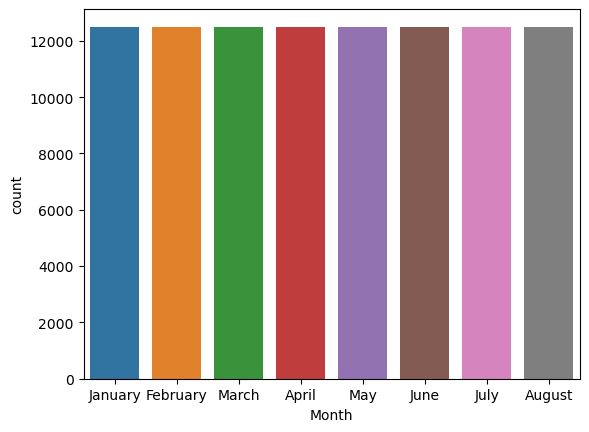

In [14]:
sns.countplot(df['Month'])

In [15]:
import datetime
df['Month'] = df['Month'].apply(lambda x: datetime.datetime.strptime(x, '%B').month)

In [16]:
df['Month'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

# Age

In [17]:
df['Age'].unique()

array(['23', '-500', '28_', ..., '4808_', '2263', '1342'], dtype=object)

>- Age has unreasonable values and characters so we need to handle it

In [18]:
df['Age'] = df['Age'].str.replace('-','')
df['Age'] = df['Age'].str.replace('_','')
df['Age'] = df['Age'].astype(int)

In [19]:
df['Age'].unique()

array([  23,  500,   28, ..., 4808, 2263, 1342])

<AxesSubplot:xlabel='Age', ylabel='Density'>

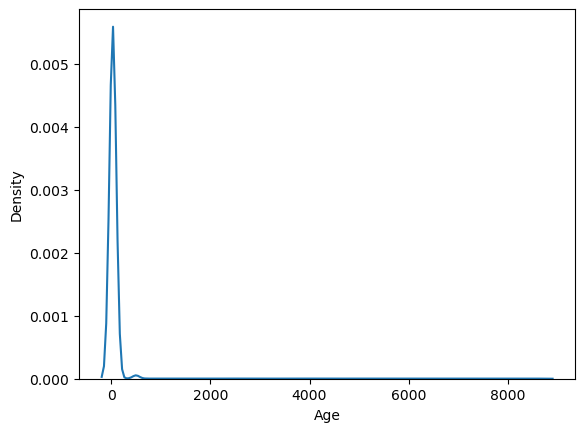

In [20]:
sns.kdeplot(df['Age'])

In [21]:
df['Age'].describe()

count    100000.000000
mean        119.509700
std         684.757313
min          14.000000
25%          25.000000
50%          34.000000
75%          42.000000
max        8698.000000
Name: Age, dtype: float64

In [22]:
check_outliers('Age',df)

[500,
 7580,
 500,
 181,
 995,
 5079,
 6409,
 500,
 7080,
 849,
 500,
 3885,
 3052,
 5342,
 4431,
 500,
 2657,
 2111,
 1032,
 500,
 456,
 5717,
 500,
 500,
 500,
 3169,
 1191,
 500,
 7140,
 500,
 500,
 8233,
 6955,
 500,
 2534,
 3115,
 7657,
 5112,
 500,
 6452,
 2744,
 500,
 1439,
 5795,
 4872,
 500,
 1772,
 1383,
 5657,
 500,
 1934,
 500,
 8352,
 500,
 3734,
 500,
 2056,
 500,
 7508,
 2339,
 8406,
 1424,
 500,
 500,
 500,
 500,
 6953,
 5626,
 4471,
 548,
 500,
 500,
 500,
 500,
 769,
 500,
 500,
 500,
 5490,
 525,
 4202,
 3665,
 7670,
 500,
 4670,
 3616,
 6922,
 6619,
 1808,
 7992,
 223,
 1232,
 4659,
 6895,
 395,
 7099,
 500,
 6048,
 3936,
 500,
 3512,
 123,
 500,
 5639,
 471,
 500,
 7359,
 4049,
 5053,
 2109,
 7183,
 5604,
 1206,
 6835,
 500,
 4067,
 1812,
 1170,
 3625,
 500,
 6354,
 3724,
 480,
 500,
 500,
 500,
 5610,
 4710,
 500,
 4351,
 5784,
 3937,
 3542,
 2239,
 5645,
 500,
 7425,
 7851,
 500,
 2027,
 6306,
 835,
 3513,
 6846,
 6868,
 7805,
 500,
 7274,
 500,
 831,
 8394,
 500

In [23]:
handle_outliers('Age',df)

In [24]:
check_outliers('Age',df)

[]

Text(0.5, 1.0, 'Age distribution')

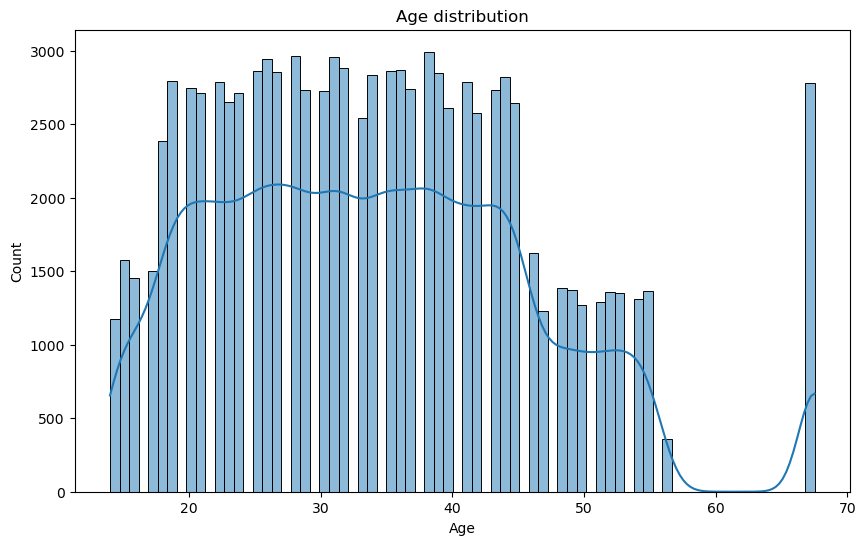

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(x=df['Age'],kde=True)
plt.title("Age distribution")

In [26]:
df['Age'].describe()

count    100000.000000
mean         34.270555
std          12.014335
min          14.000000
25%          25.000000
50%          34.000000
75%          42.000000
max          67.500000
Name: Age, dtype: float64

>- A majority of our customers are in their young age, in their 30's and 40's

# Occupation

In [27]:
df['Occupation'].value_counts()

_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64

In [28]:
df['Occupation'] = df['Occupation'].replace('_______','FreeLancer')

In [29]:
df['Occupation'].unique()

array(['Scientist', 'FreeLancer', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [30]:
df['Occupation'].value_counts()

FreeLancer       7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64

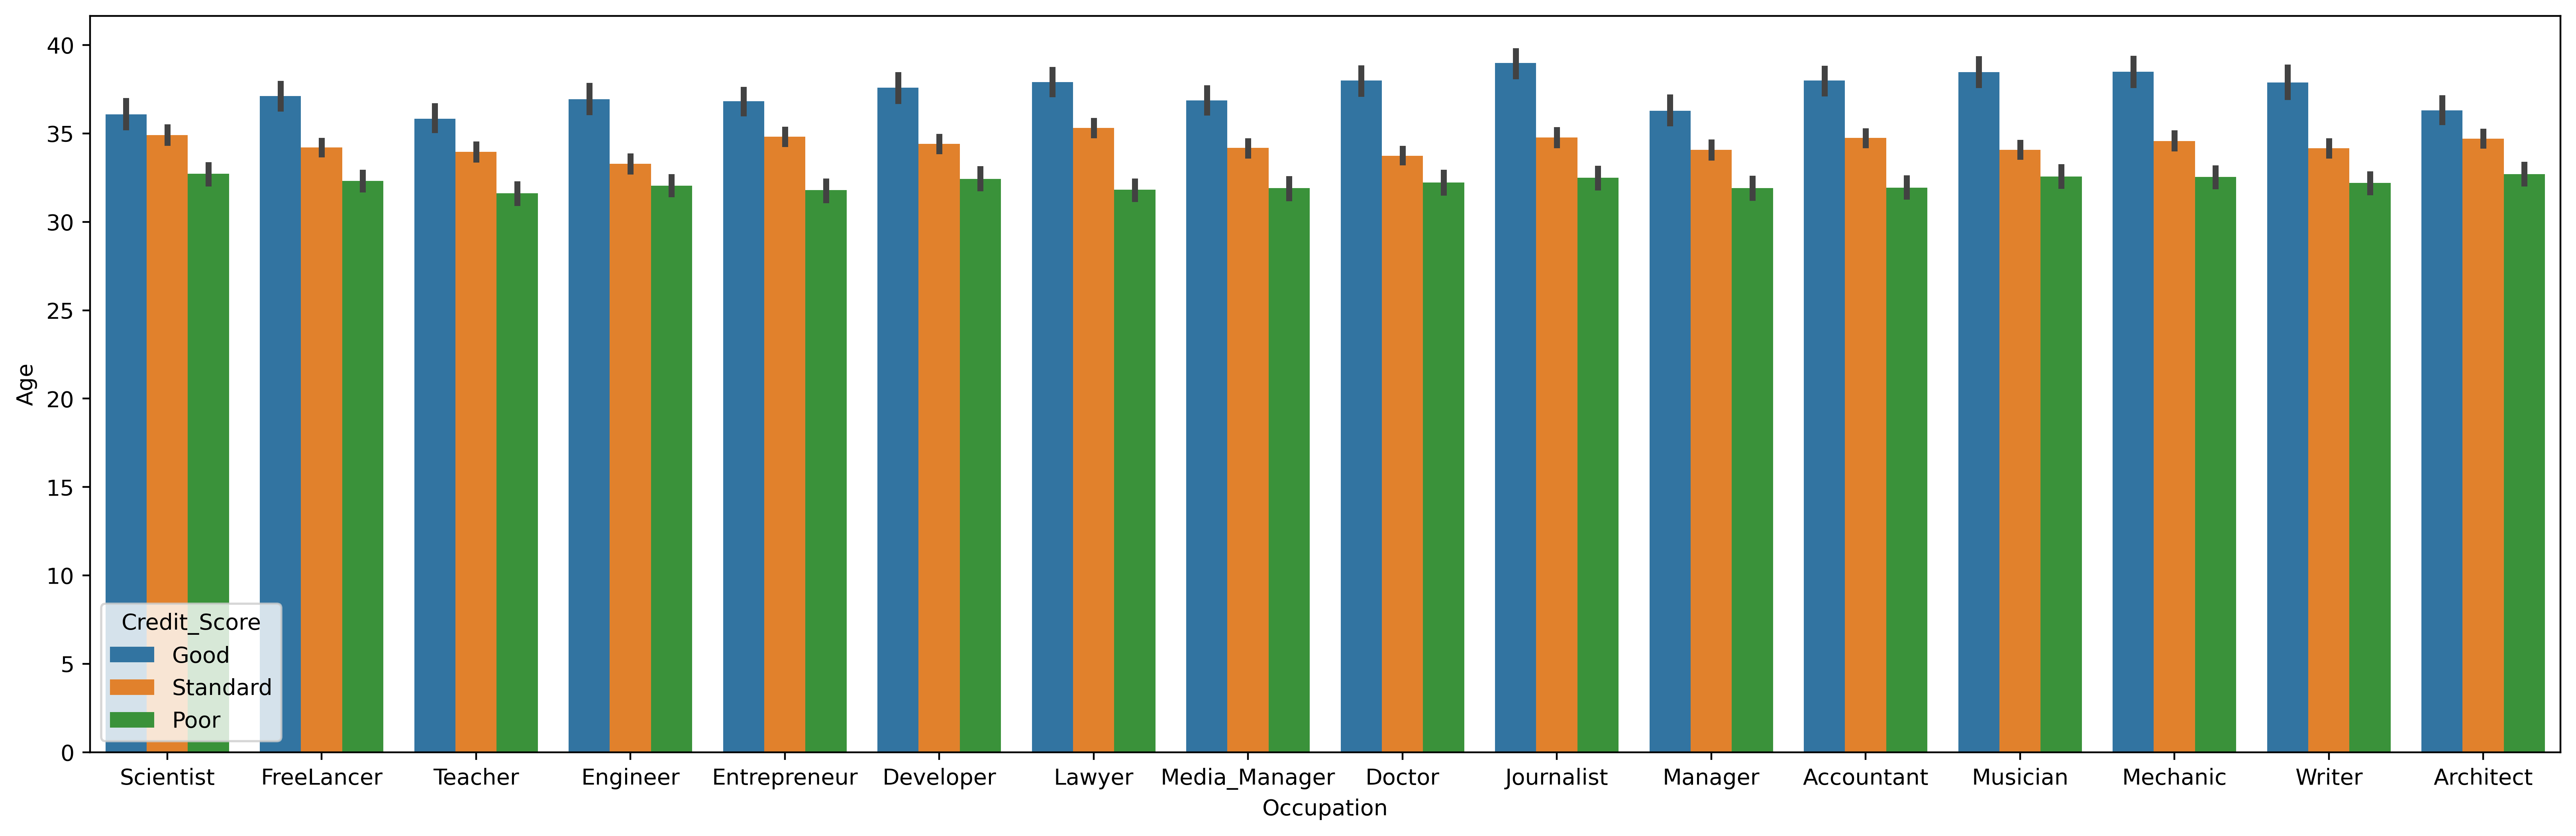

In [31]:
plt.figure(figsize = (20,6), dpi = 400)
sns.barplot(x='Occupation',y='Age',data =df,hue='Credit_Score')
plt.show()

>- i think the occupation doesn't have a strong effect on Credit Score

>- I will apply one hot encoder to turn the occupation into numeric

In [32]:
# df = pd.get_dummies(df,columns=['Occupation'],drop_first=True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int64  
 1   Age                       100000 non-null  float64
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  object 
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  object 
 9   Type_of_Loan              88592 non-null   object 
 10  Delay_from_due_date       100000 non-null  int64  
 11  Num_of_Delayed_Payment    92998 non-null   object 
 12  Changed_Credit_Limit      100000 non-null  object 
 13  Num_Credit_Inquiries      98035 non-null   fl

# Annual_Income

In [34]:
df['Annual_Income'].unique()

array(['19114.12', '34847.84', '34847.84_', ..., '20002.88', '39628.99',
       '39628.99_'], dtype=object)

In [35]:
df['Annual_Income'] = df['Annual_Income'].str.replace('_','')
df['Annual_Income'] = df['Annual_Income'].str.replace('-','')
df['Annual_Income'] = df['Annual_Income'].astype(float)

<AxesSubplot:xlabel='Annual_Income', ylabel='Density'>

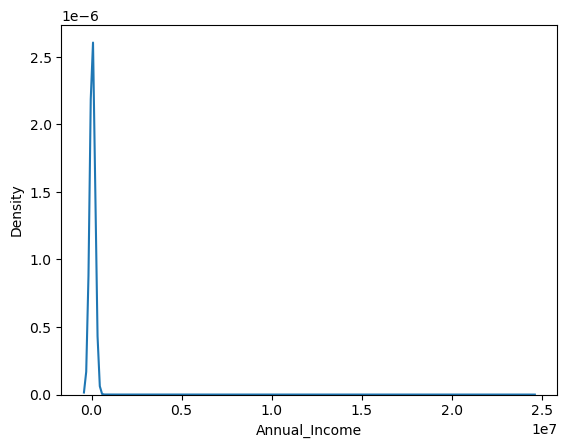

In [36]:
sns.kdeplot(df['Annual_Income'])

In [37]:
df['Annual_Income'].describe()

count    1.000000e+05
mean     1.764157e+05
std      1.429618e+06
min      7.005930e+03
25%      1.945750e+04
50%      3.757861e+04
75%      7.279092e+04
max      2.419806e+07
Name: Annual_Income, dtype: float64

Text(0.5, 1.0, 'Annual Income By Occupation')

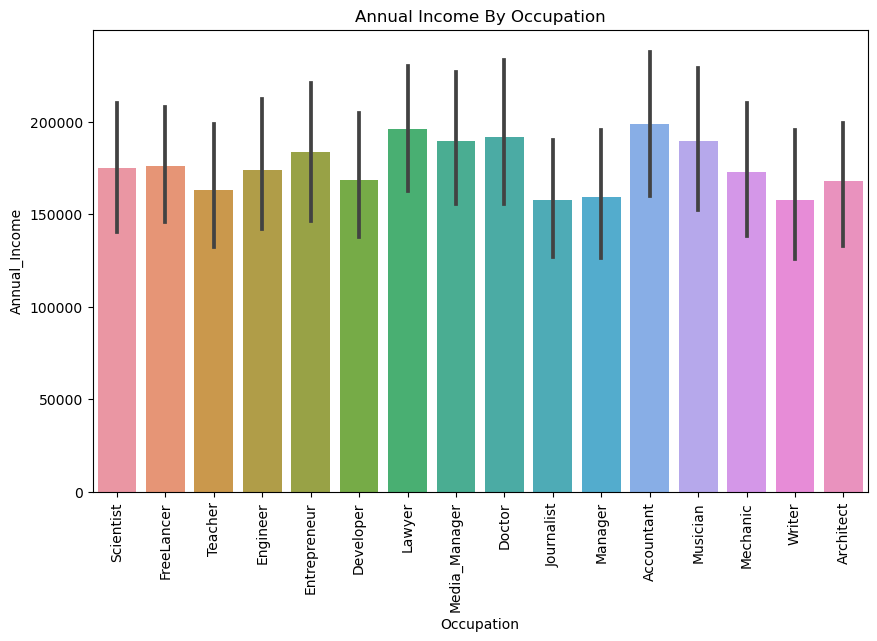

In [38]:
plt.figure(figsize=(10, 6))
plt.xticks(fontsize=10, rotation="vertical")
sns.barplot(y=df['Annual_Income'], x=df["Occupation"])
plt.title("Annual Income By Occupation")

In [39]:
handle_outliers('Annual_Income',df)

In [40]:
check_outliers('Annual_Income',df)

[]

<AxesSubplot:xlabel='Annual_Income', ylabel='Density'>

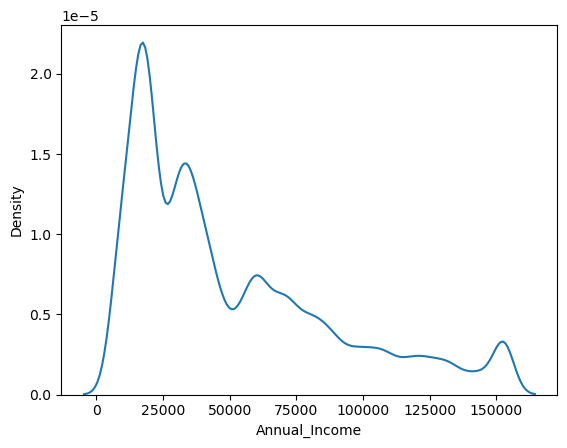

In [41]:
sns.kdeplot(df['Annual_Income'])

Text(0.5, 1.0, 'Annual Income By Occupation')

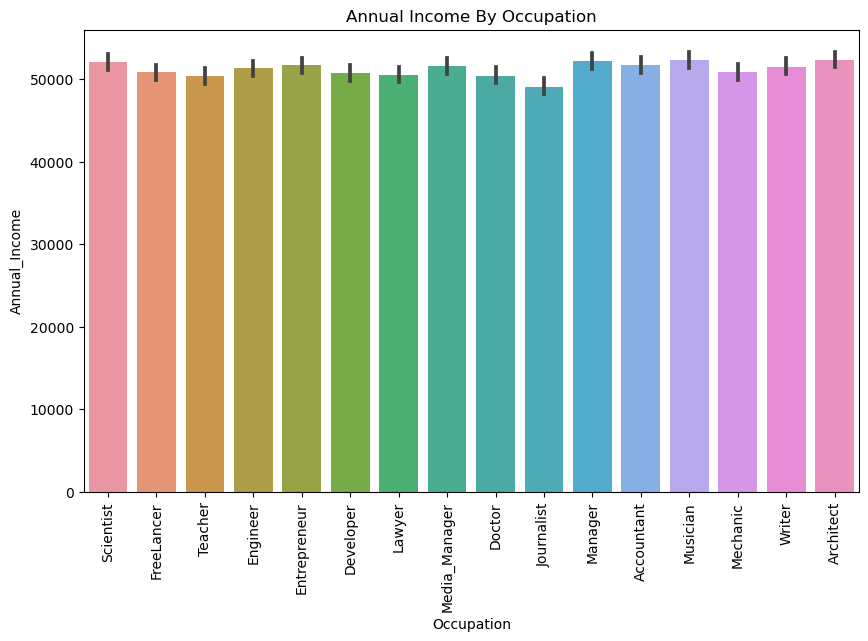

In [42]:
plt.figure(figsize=(10, 6))
plt.xticks(fontsize=10, rotation="vertical")
sns.barplot(y=df['Annual_Income'], x=df["Occupation"])
plt.title("Annual Income By Occupation")

# Monthly_Inhand_Salary

In [43]:
df['Monthly_Inhand_Salary'].unique()

array([1824.84333333,           nan, 3037.98666667, ..., 3097.00833333,
       1929.90666667, 3359.41583333])

In [44]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
df['Monthly_Inhand_Salary'] = imputer.fit_transform(df['Monthly_Inhand_Salary'].values.reshape(-1,1))

In [45]:
df['Monthly_Inhand_Salary'].isna().sum()

0

<AxesSubplot:xlabel='Monthly_Inhand_Salary', ylabel='Density'>

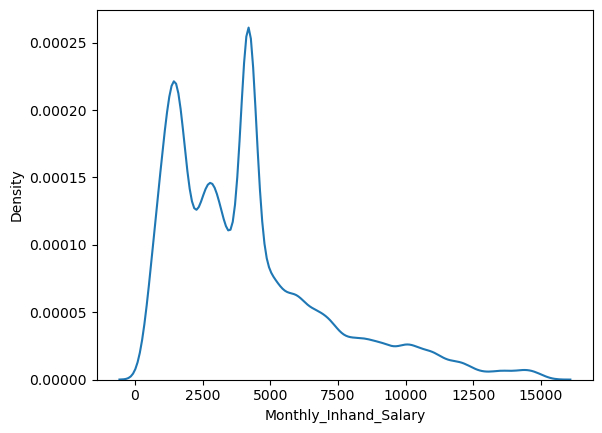

In [46]:
sns.kdeplot(df['Monthly_Inhand_Salary'])

In [47]:
df['Monthly_Inhand_Salary'].describe()

count    100000.000000
mean       4194.170850
std        2935.176493
min         303.645417
25%        1792.084167
50%        3852.736667
75%        5371.525000
max       15204.633333
Name: Monthly_Inhand_Salary, dtype: float64

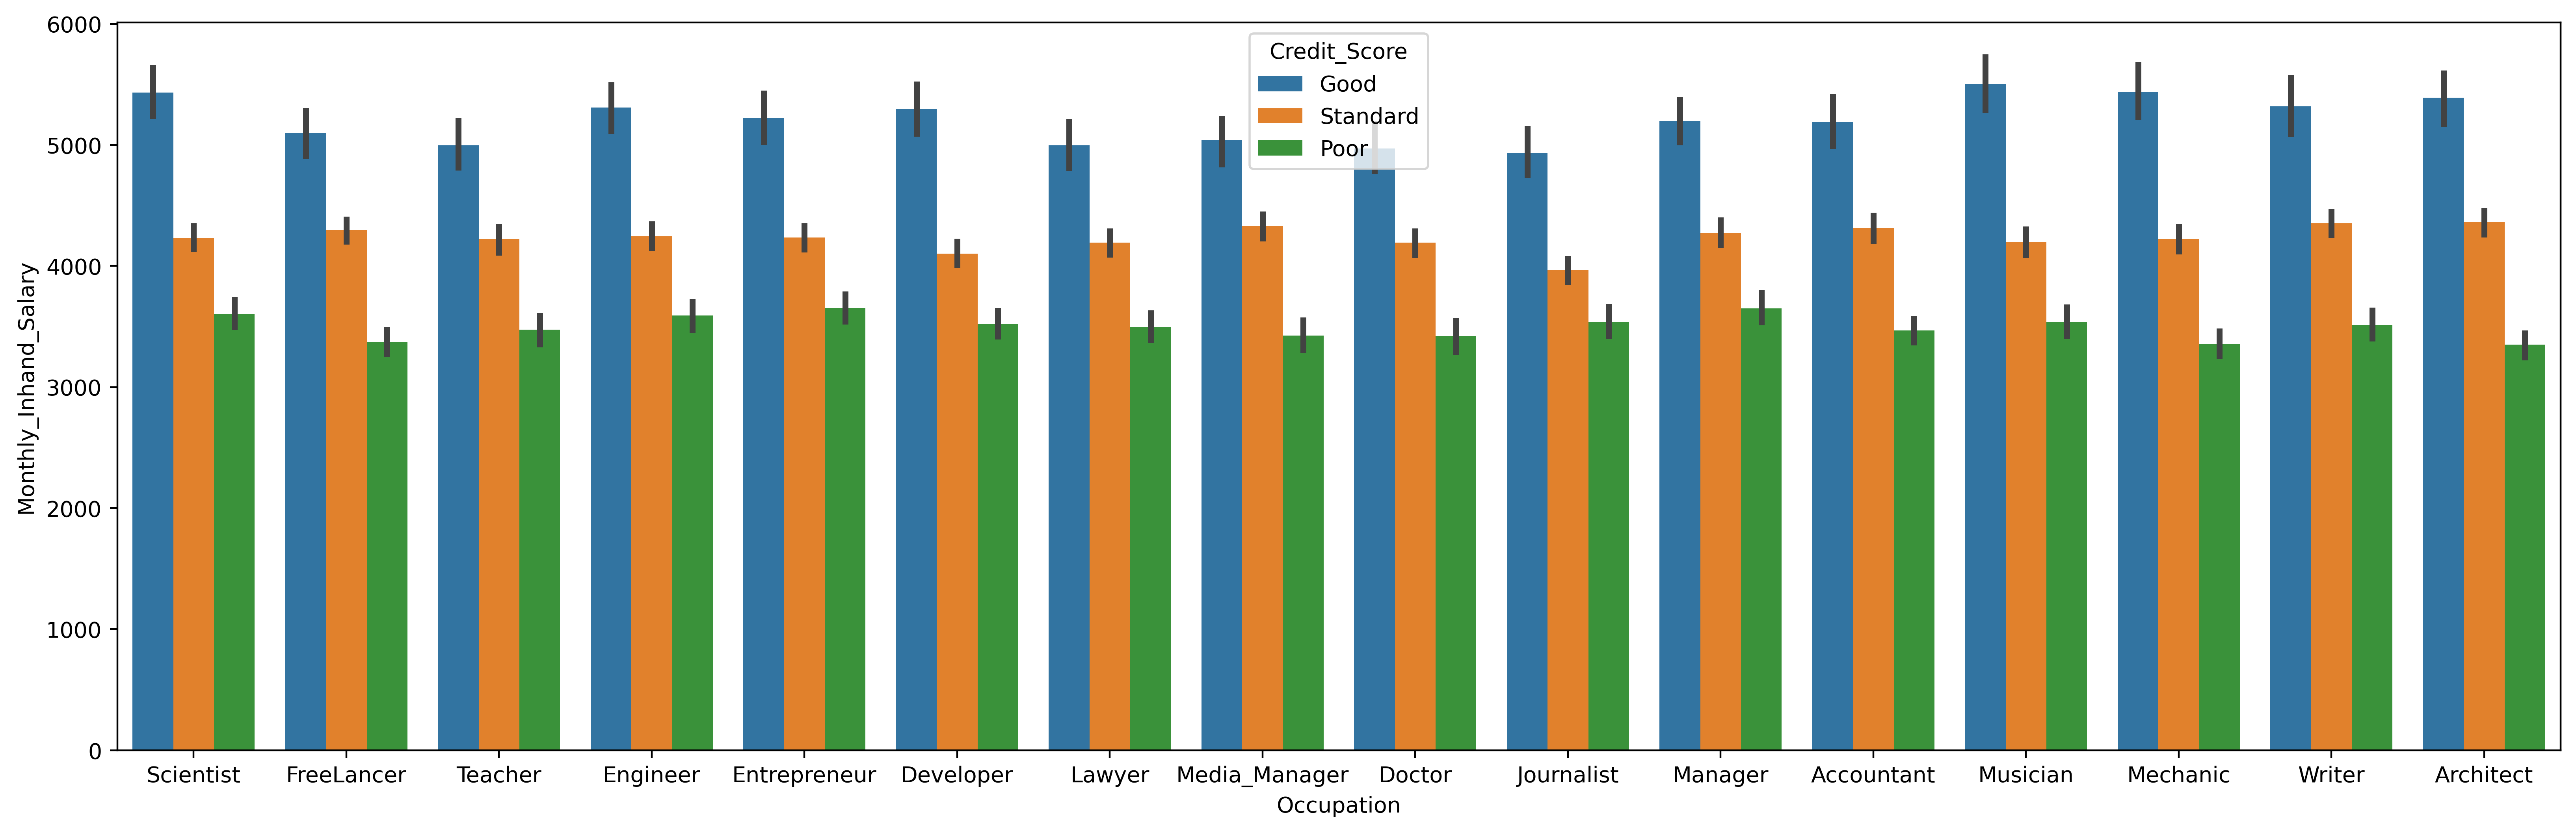

In [48]:
plt.figure(figsize = (20,6), dpi = 400)
sns.barplot(x='Occupation',y='Monthly_Inhand_Salary',data =df,hue='Credit_Score')
plt.show()

In [49]:
handle_outliers('Monthly_Inhand_Salary',df)

In [50]:
check_outliers('Monthly_Inhand_Salary',df)

[]

In [51]:
df['Monthly_Inhand_Salary'].describe()

count    100000.000000
mean       4121.979810
std        2733.865830
min         303.645417
25%        1792.084167
50%        3852.736667
75%        5371.525000
max       10740.686250
Name: Monthly_Inhand_Salary, dtype: float64

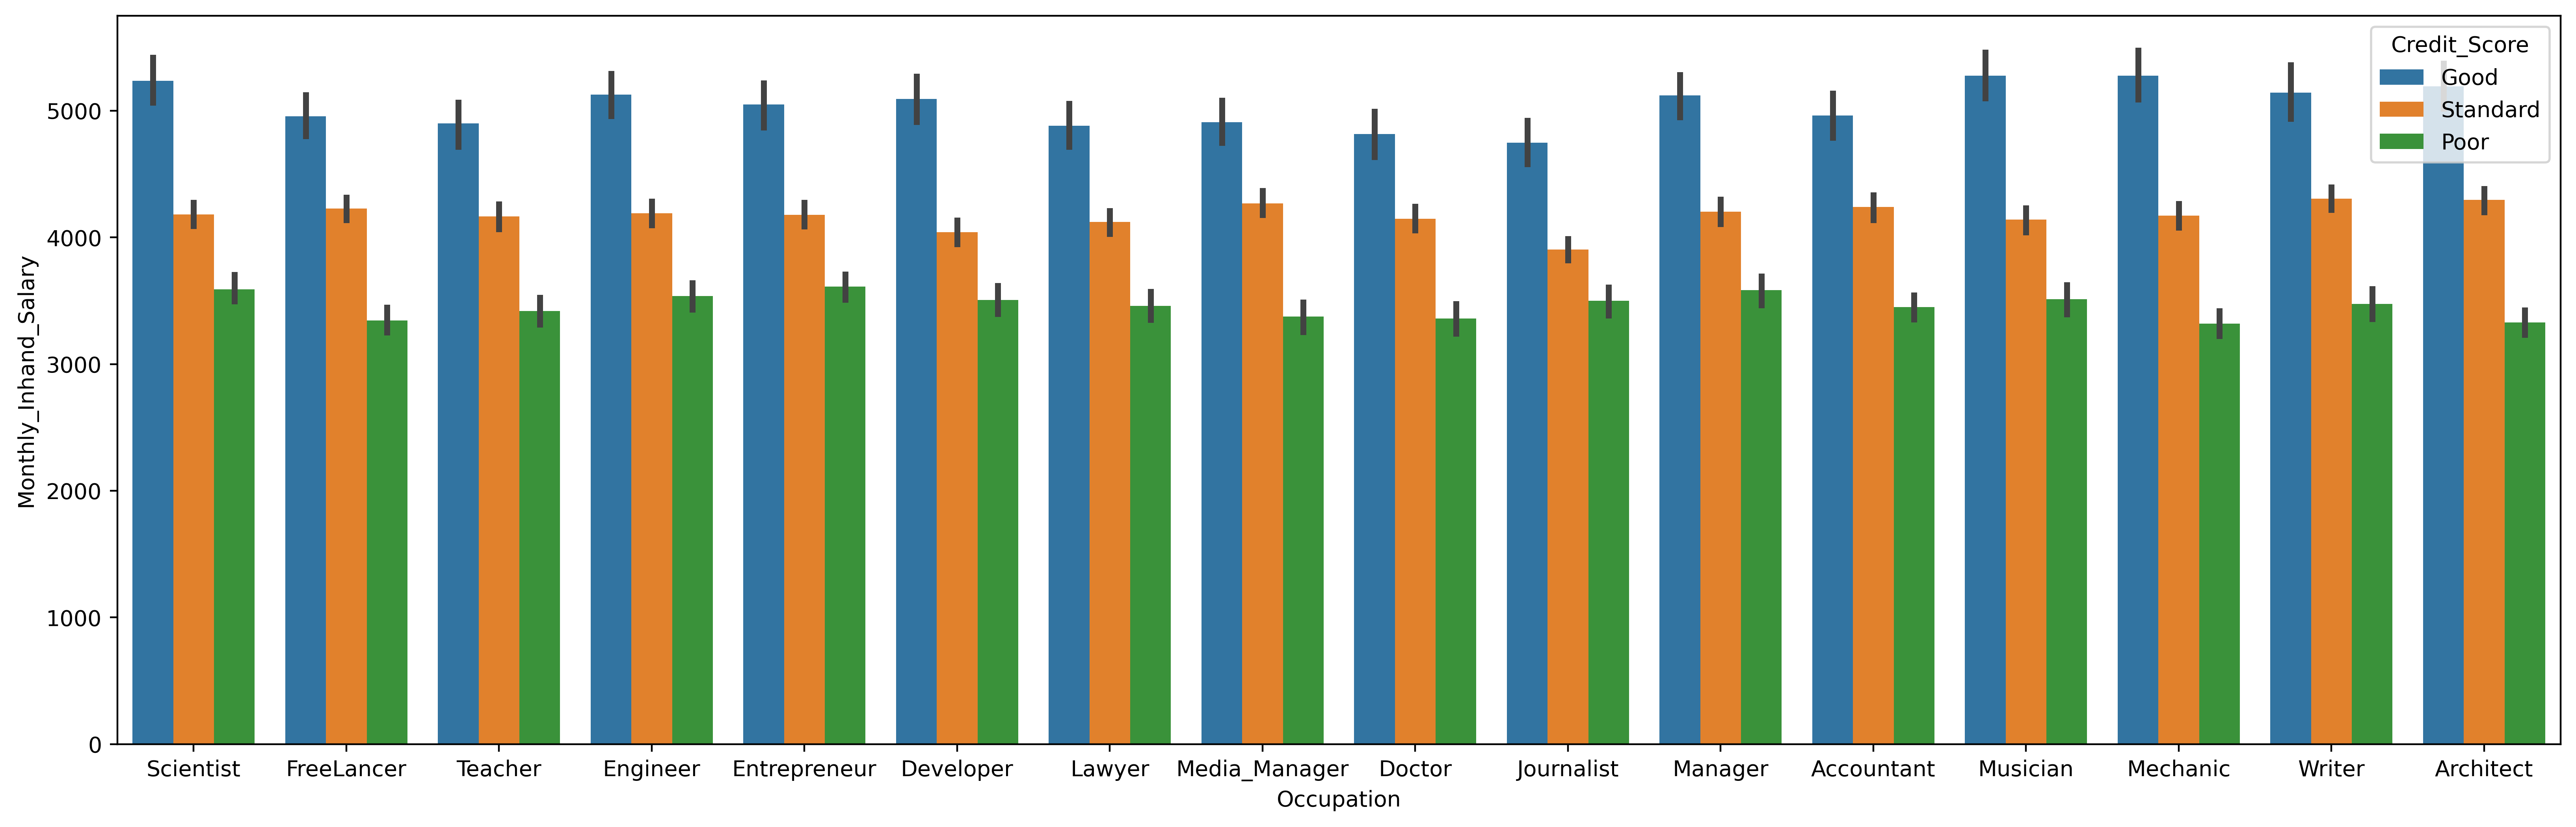

In [52]:
plt.figure(figsize = (20,6), dpi = 400)
sns.barplot(x='Occupation',y='Monthly_Inhand_Salary',data =df,hue='Credit_Score')
plt.show()

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int64  
 1   Age                       100000 non-null  float64
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  object 
 9   Type_of_Loan              88592 non-null   object 
 10  Delay_from_due_date       100000 non-null  int64  
 11  Num_of_Delayed_Payment    92998 non-null   object 
 12  Changed_Credit_Limit      100000 non-null  object 
 13  Num_Credit_Inquiries      98035 non-null   fl

# Num_Bank_Accounts

>- How many bank accounts does that person have?

In [54]:
df['Num_Bank_Accounts'].unique()

array([   3,    2,    1,    7,    4,    0,    8,    5,    6,    9,   10,
       1414, 1231,   67,  572, 1488,   91,  528, 1647, 1696, 1338,  649,
        889, 1668,  685,  857,  975, 1496, 1534, 1620,   37, 1388, 1429,
       1332, 1588,  120, 1777, 1096,  803,  494,  744, 1139,  831, 1613,
        741,  121,  665, 1748, 1644,  823, 1356, 1651,   87,  711,  450,
        210, 1671, 1722,  648,  672, 1662, 1495,  510,  666,  429, 1131,
       1434,  980, 1026,  526,  718, 1300, 1312, 1315,  501, 1566,  480,
       1042,  322,  628, 1016,  333, 1265,  791,  427,  563,  905, 1190,
       1036, 1611,   38,  619,  555, 1769,  280,  752, 1201,  812, 1487,
        222,  212, 1019, 1222,  610, 1714, 1308,  525, 1158, 1115, 1616,
        754, 1601,  797, 1577,  521,  703,  933,  959,  809, 1089, 1656,
       1113, 1715,  964, 1533, 1789,  871,  434, 1295,  565, 1724,  603,
        677,  541,  698, 1101,  464, 1539, 1462, 1011, 1257, 1727,   45,
        244, 1266,  897,  535,  484,  331,  675,  8

In [55]:
df['Num_Bank_Accounts'].describe()

count    100000.000000
mean         17.091280
std         117.404834
min          -1.000000
25%           3.000000
50%           6.000000
75%           7.000000
max        1798.000000
Name: Num_Bank_Accounts, dtype: float64

In [56]:
handle_outliers('Num_Bank_Accounts',df)

In [57]:
df['Num_Bank_Accounts'][df['Num_Bank_Accounts'] < 0] = 0

In [58]:
df['Num_Bank_Accounts'].describe()

count    100000.000000
mean          5.468200
std           2.719004
min           0.000000
25%           3.000000
50%           6.000000
75%           7.000000
max          13.000000
Name: Num_Bank_Accounts, dtype: float64

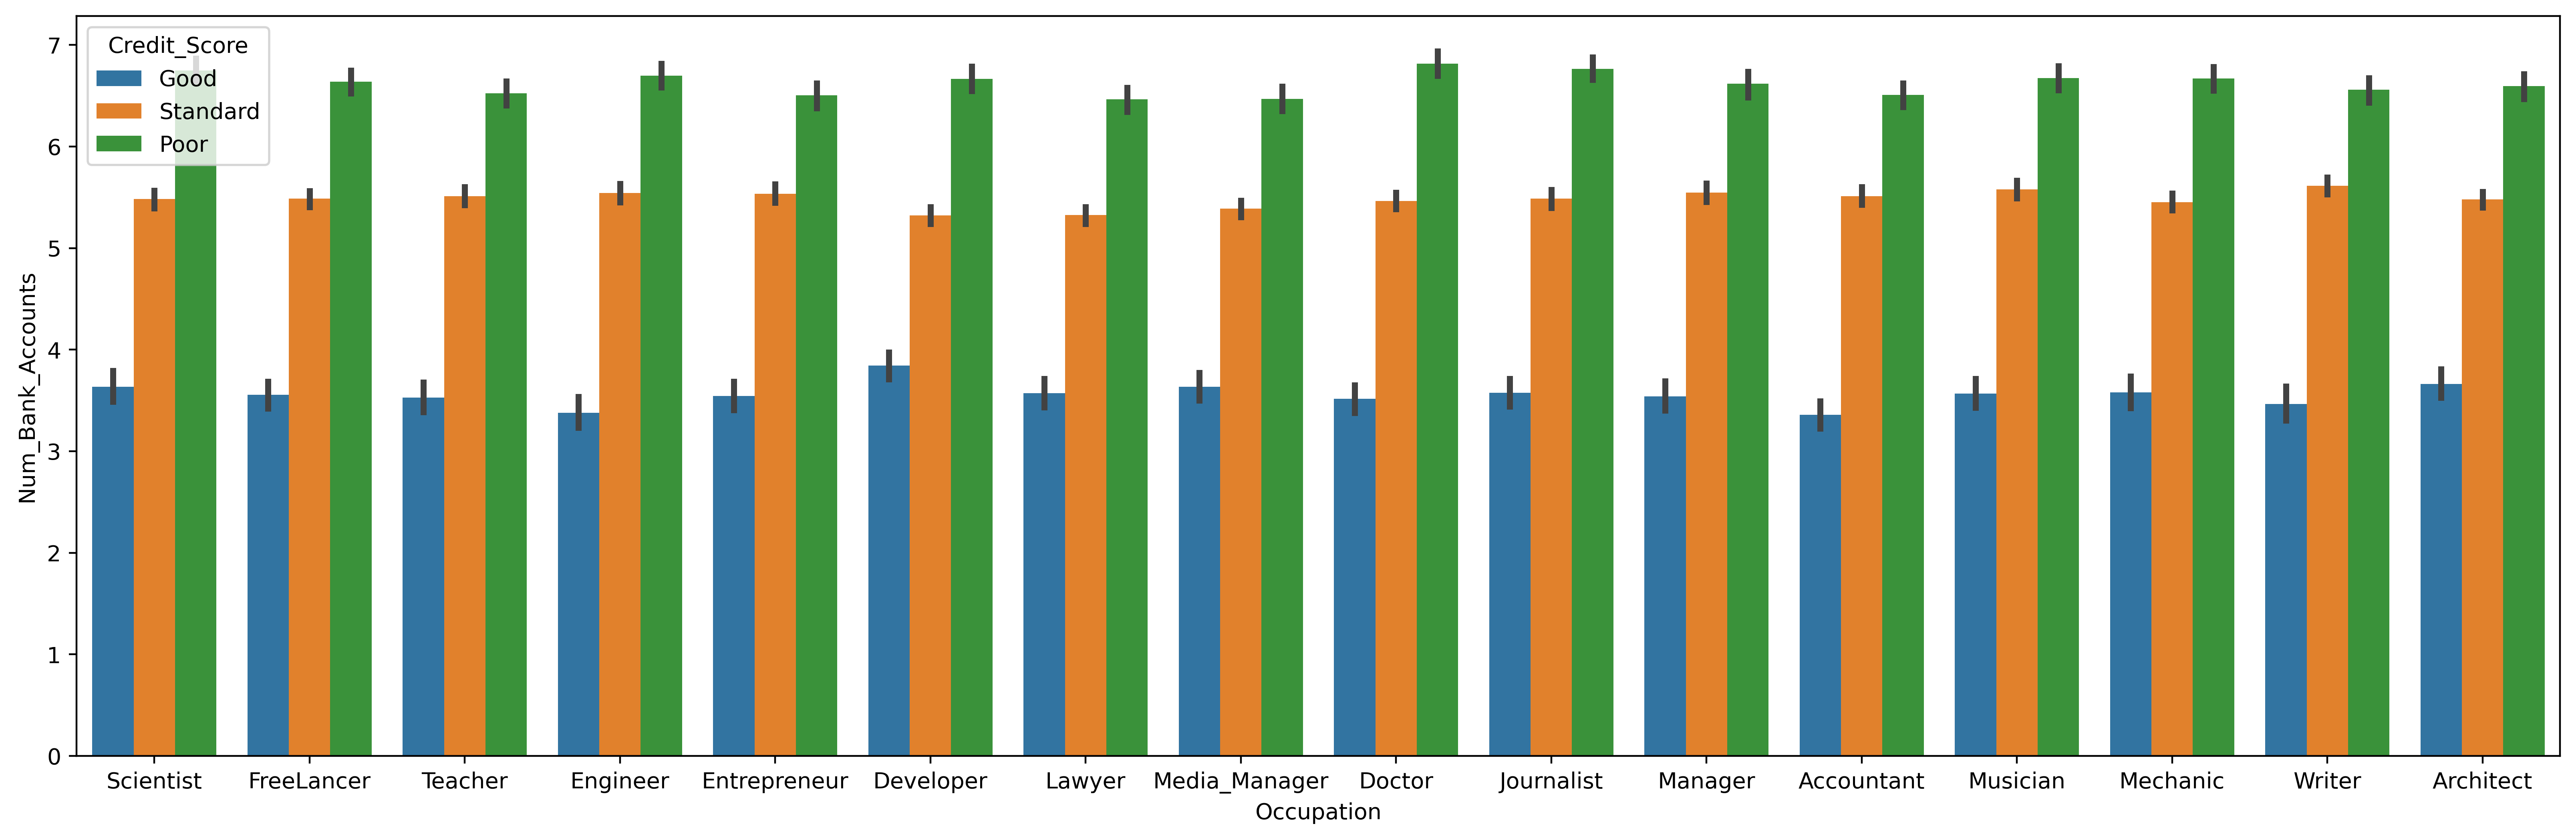

In [59]:
plt.figure(figsize = (20,6), dpi = 400)
sns.barplot(x='Occupation',y='Num_Bank_Accounts',data =df,hue='Credit_Score')
plt.show()

>- The person that has more bank accounts has a lower credit score

# Num_Credit_Card

>- How many credit cards does that person have?

In [60]:
df['Num_Credit_Card'].unique()

array([   4, 1385,    5, ...,  955, 1430,  679], dtype=int64)

In [61]:
df['Num_Credit_Card'].describe()

count    100000.00000
mean         22.47443
std         129.05741
min           0.00000
25%           4.00000
50%           5.00000
75%           7.00000
max        1499.00000
Name: Num_Credit_Card, dtype: float64

In [62]:
handle_outliers('Num_Credit_Card',df)

In [63]:
df['Num_Credit_Card'].describe()

count    100000.000000
mean          5.668825
std           2.229002
min           0.000000
25%           4.000000
50%           5.000000
75%           7.000000
max          11.500000
Name: Num_Credit_Card, dtype: float64

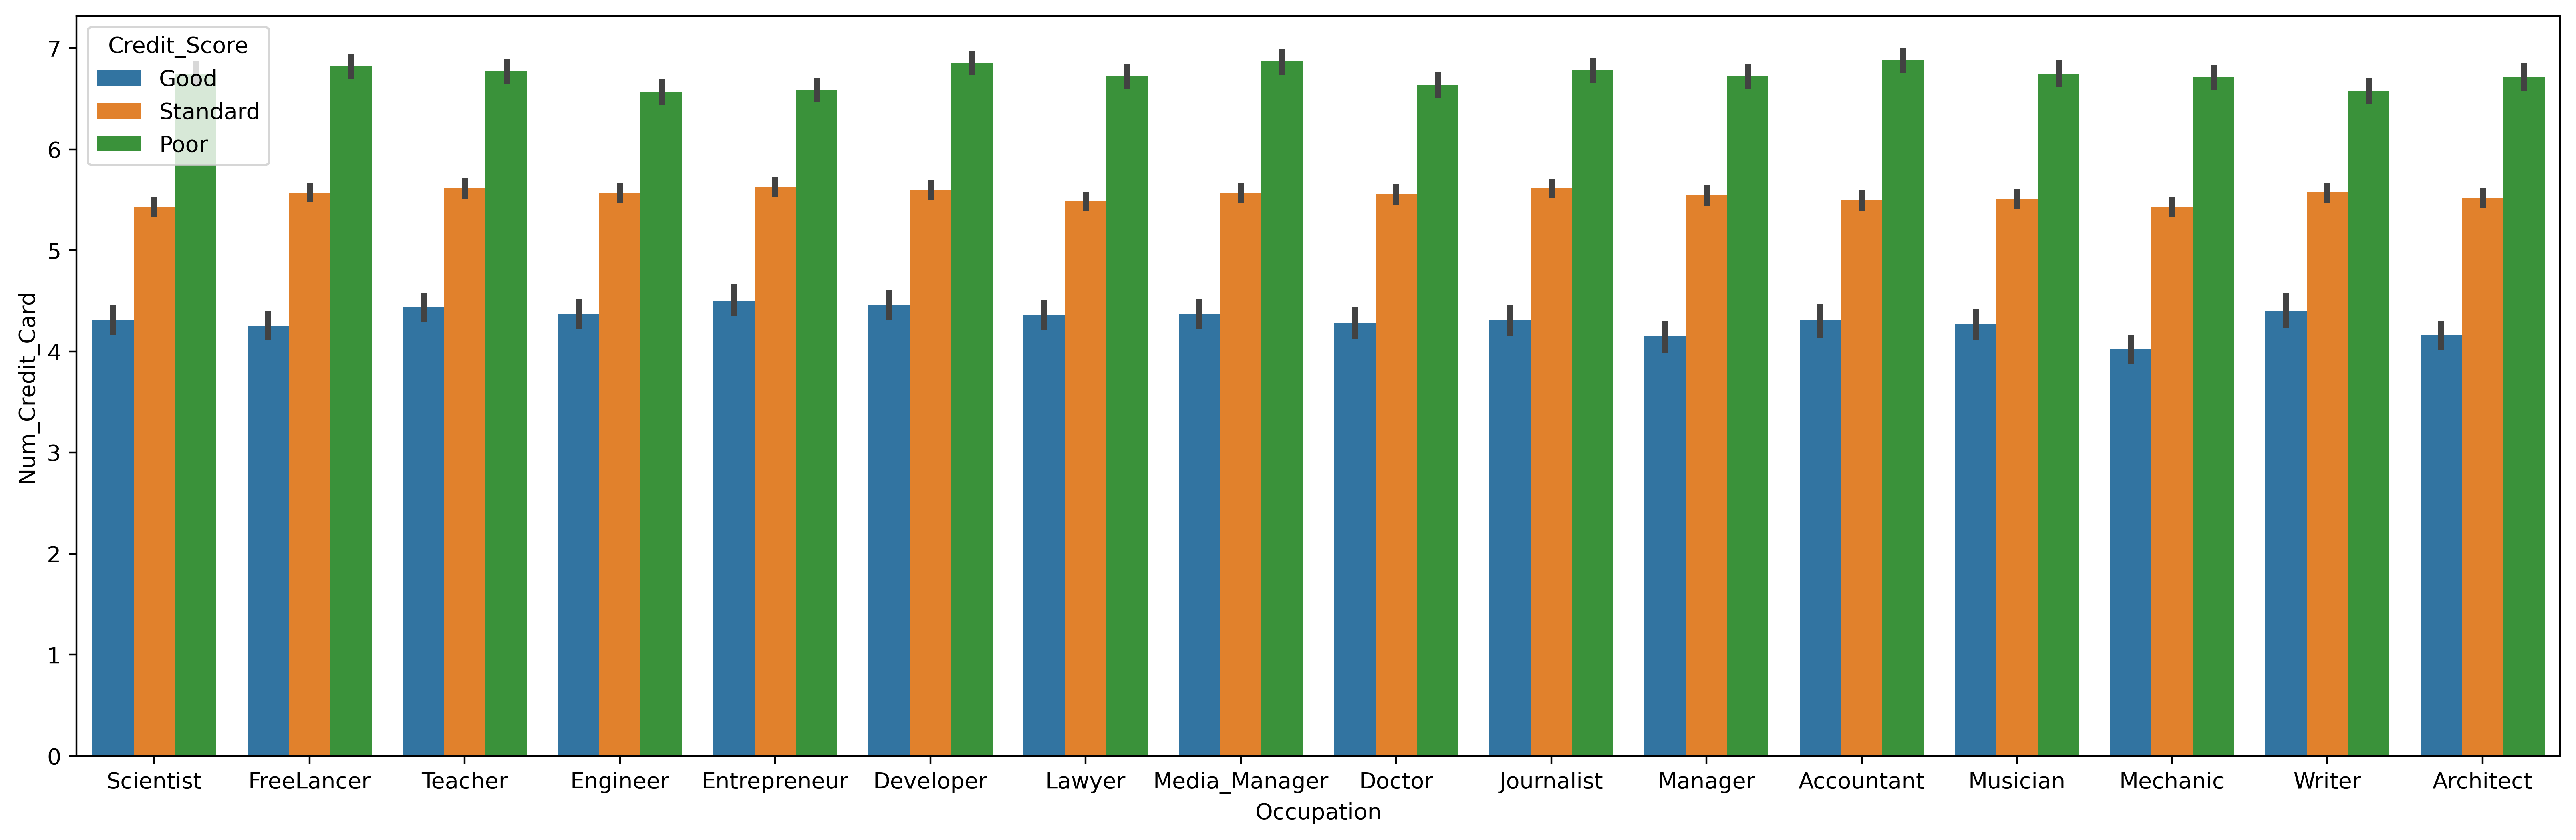

In [64]:
plt.figure(figsize = (20,6), dpi = 400)
sns.barplot(x='Occupation',y='Num_Credit_Card',data =df,hue='Credit_Score')
plt.show()

>- The person that has more credit cards has a lower credit score

# Interest_Rate

>-  the price you pay to borrow money – whether that's a student loan, a mortgage or a credit card. When you borrow money, you generally must pay back the original amount you borrowed, plus a certain percentage of the loan amount as interest.

In [65]:
df['Interest_Rate'].unique()

array([   3,    6,    8, ..., 1347,  387, 5729], dtype=int64)

In [66]:
df['Interest_Rate'].describe()

count    100000.000000
mean         72.466040
std         466.422621
min           1.000000
25%           8.000000
50%          13.000000
75%          20.000000
max        5797.000000
Name: Interest_Rate, dtype: float64

In [67]:
handle_outliers('Interest_Rate',df)

In [68]:
df['Interest_Rate'].describe()

count    100000.000000
mean         15.008950
std           9.263065
min           1.000000
25%           8.000000
50%          13.000000
75%          20.000000
max          38.000000
Name: Interest_Rate, dtype: float64

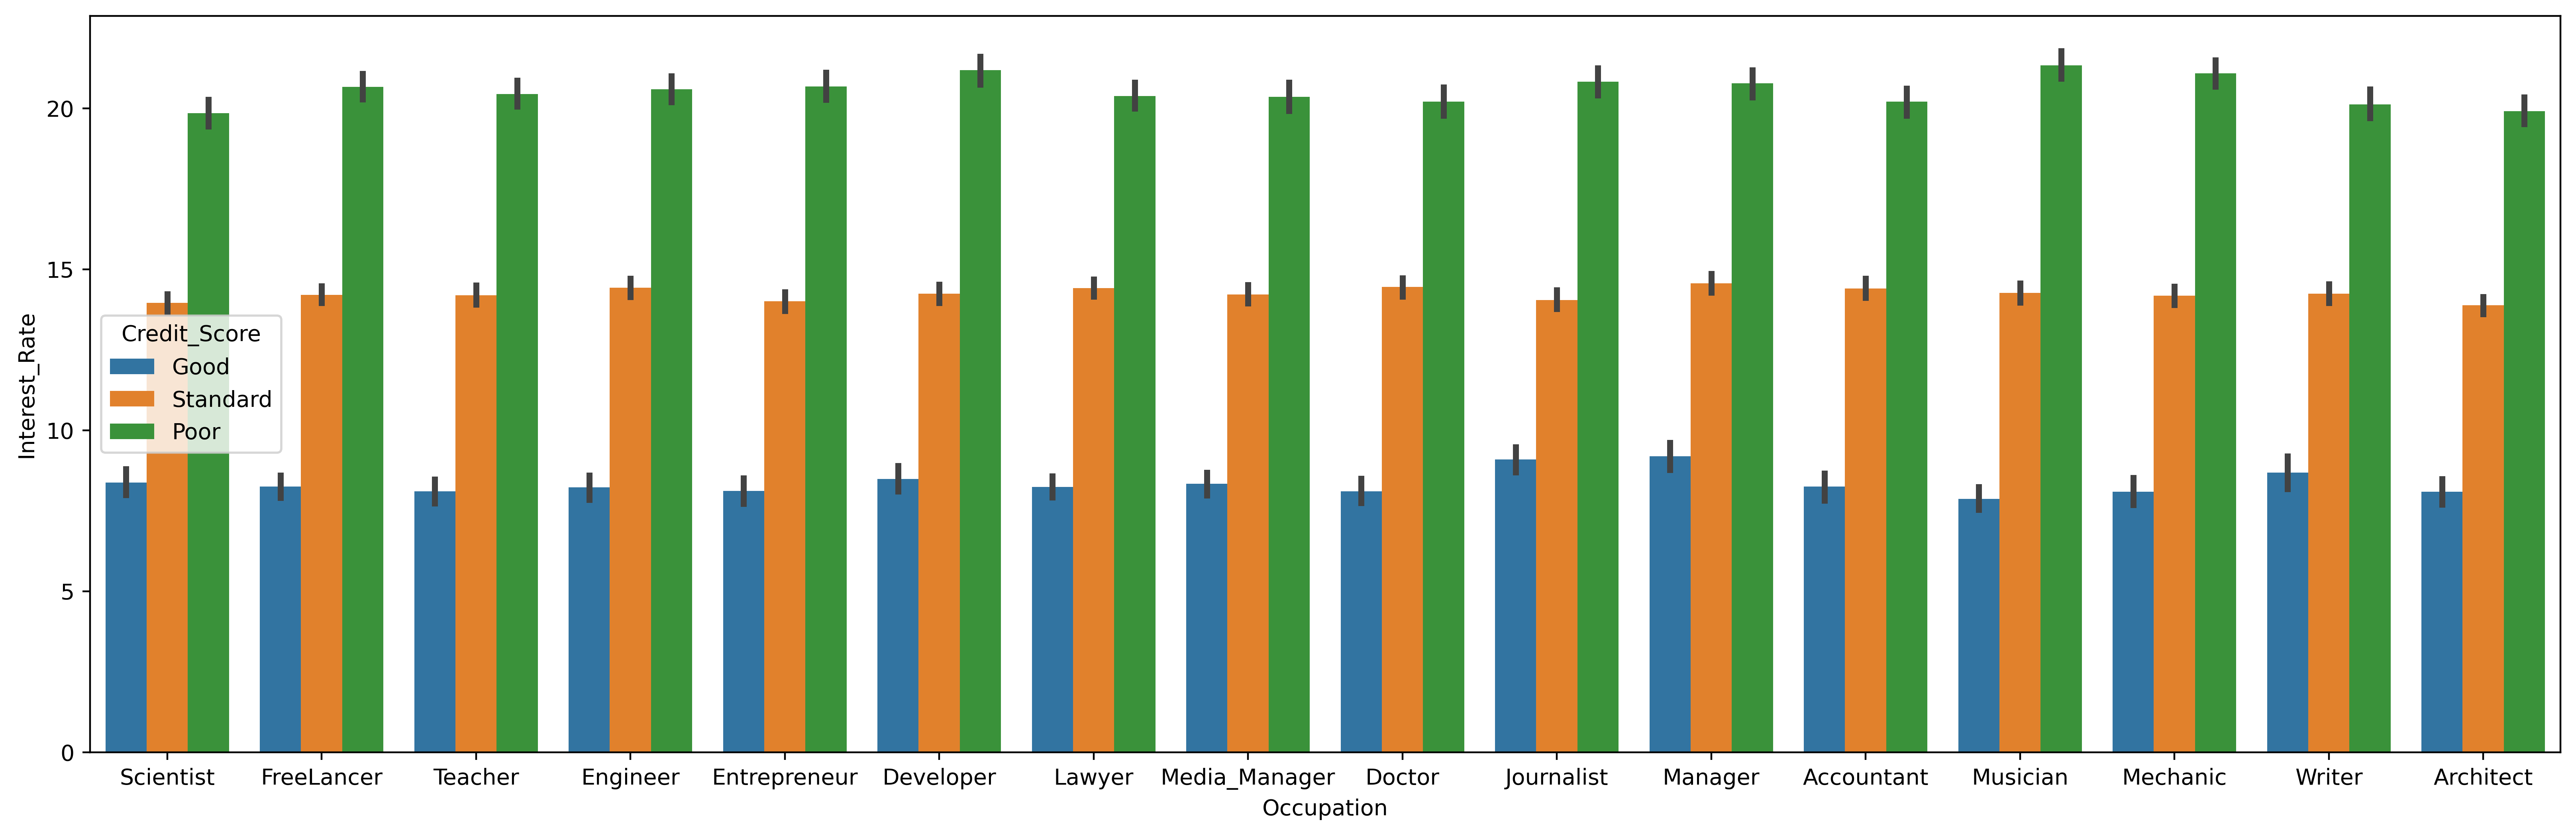

In [69]:
plt.figure(figsize = (20,6), dpi = 400)
sns.barplot(x='Occupation',y='Interest_Rate',data =df,hue='Credit_Score')
plt.show()

>- Of course the more interest rate the more your credit score decrease

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int64  
 1   Age                       100000 non-null  float64
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  float64
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  object 
 9   Type_of_Loan              88592 non-null   object 
 10  Delay_from_due_date       100000 non-null  int64  
 11  Num_of_Delayed_Payment    92998 non-null   object 
 12  Changed_Credit_Limit      100000 non-null  object 
 13  Num_Credit_Inquiries      98035 non-null   fl

## Num_of_Loan

>- How many loans did that person have ?

In [71]:
df['Num_of_Loan'].unique()

array(['4', '1', '3', '967', '-100', '0', '0_', '2', '3_', '2_', '7', '5',
       '5_', '6', '8', '8_', '9', '9_', '4_', '7_', '1_', '1464', '6_',
       '622', '352', '472', '1017', '945', '146', '563', '341', '444',
       '720', '1485', '49', '737', '1106', '466', '728', '313', '843',
       '597_', '617', '119', '663', '640', '92_', '1019', '501', '1302',
       '39', '716', '848', '931', '1214', '186', '424', '1001', '1110',
       '1152', '457', '1433', '1187', '52', '1480', '1047', '1035',
       '1347_', '33', '193', '699', '329', '1451', '484', '132', '649',
       '995', '545', '684', '1135', '1094', '1204', '654', '58', '348',
       '614', '1363', '323', '1406', '1348', '430', '153', '1461', '905',
       '1312', '1424', '1154', '95', '1353', '1228', '819', '1006', '795',
       '359', '1209', '590', '696', '1185_', '1465', '911', '1181', '70',
       '816', '1369', '143', '1416', '455', '55', '1096', '1474', '420',
       '1131', '904', '89', '1259', '527', '1241', '449', 

In [72]:
df['Num_of_Loan'] = df['Num_of_Loan'].str.replace('_','')
df['Num_of_Loan'] = df['Num_of_Loan'].str.replace('-','')
df['Num_of_Loan'] = df['Num_of_Loan'].astype(int)

In [73]:
df['Num_of_Loan'].describe()

count    100000.000000
mean         10.761960
std          61.789933
min           0.000000
25%           2.000000
50%           3.000000
75%           6.000000
max        1496.000000
Name: Num_of_Loan, dtype: float64

In [74]:
handle_outliers('Num_of_Loan',df)

In [75]:
df['Num_of_Loan'].describe()

count    100000.000000
mean          3.901870
std           2.951262
min           0.000000
25%           2.000000
50%           3.000000
75%           6.000000
max          12.000000
Name: Num_of_Loan, dtype: float64

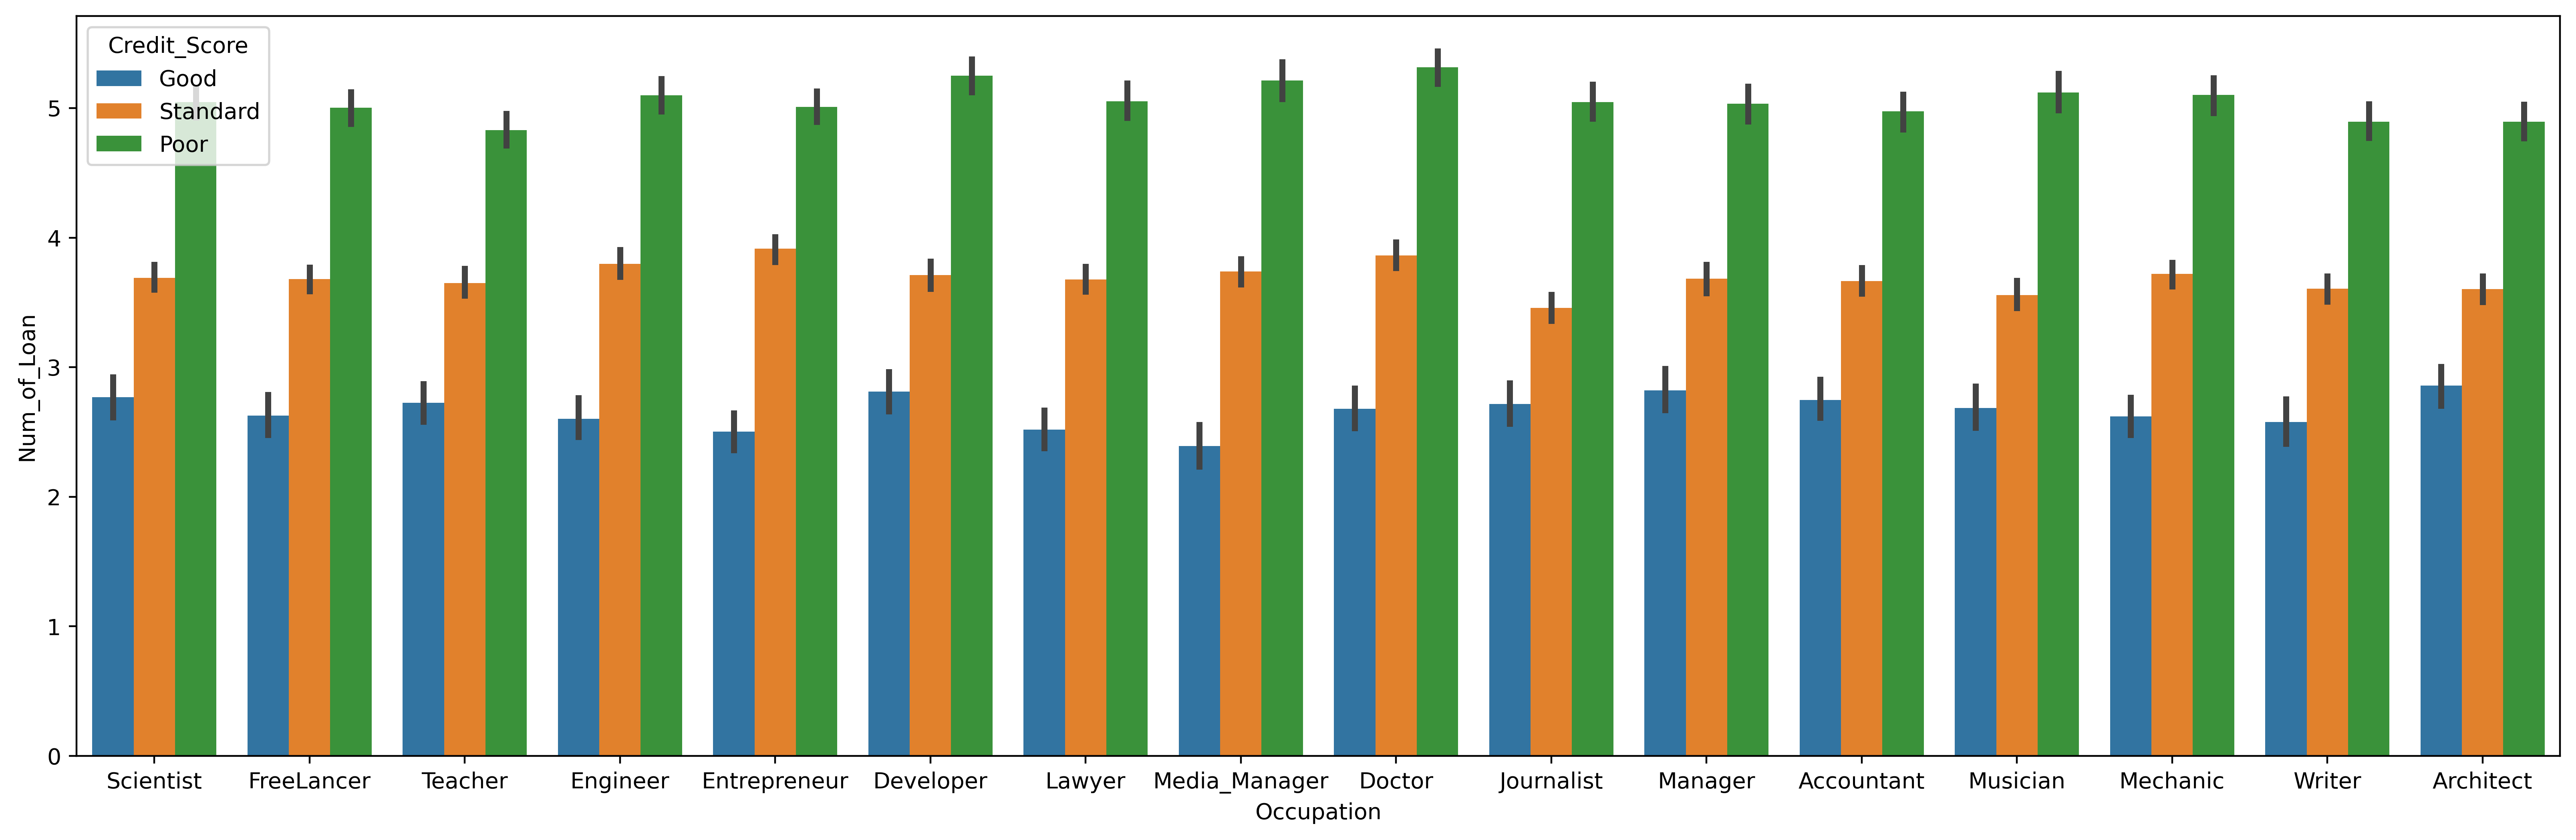

In [76]:
plt.figure(figsize = (20,6), dpi = 400)
sns.barplot(x='Occupation',y='Num_of_Loan',data =df,hue='Credit_Score')
plt.show()

>- people that took more loans has a lower credit score

# Type_of_Loan

In [77]:
df['Type_of_Loan'].unique()

array(['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
       'Credit-Builder Loan', 'Auto Loan, Auto Loan, and Not Specified',
       ..., 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan',
       'Payday Loan, Student Loan, Mortgage Loan, and Not Specified',
       'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan'],
      dtype=object)

In [78]:
df['Type_of_Loan'].isna().sum()

11408

In [79]:
imputer = SimpleImputer(missing_values= np.nan,strategy='most_frequent')
df['Type_of_Loan'] = imputer.fit_transform(df['Type_of_Loan'].values.reshape(-1,1))

In [80]:
df['Type_of_Loan'].isna().sum()

0

In [81]:
df['Type_of_Loan'].nunique()

6260

>- we can't make one hot encoder due to this huge number of unique values that will cause overfitting
>- The eight different types of loans you should know are personal loans, auto loans, student loans, mortgage loans, home equity loans, credit-builder loans, debt consolidation loans and payday loans.

In [82]:
df['Type_of_Loan'].unique()

array(['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
       'Credit-Builder Loan', 'Auto Loan, Auto Loan, and Not Specified',
       ..., 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan',
       'Payday Loan, Student Loan, Mortgage Loan, and Not Specified',
       'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan'],
      dtype=object)

>- The person may be has a lot of loans from different accounts
>- And from Finance point of view we have 16 different types of loans (8 majors that mentioned above)
>- https://www.forbes.com/advisor/loans/types-of-loans/
>-  Auto Loan, Credit-Builder Loan, Personal Loan,Mortgage Loan,Student Loan,Debt Consolidation Loan,Payday Loan,Home Equity Loan

In [83]:
loan_types = ['Auto Loan','Credit-Builder Loan','Personal Loan','Mortgage Loan','Student Loan',
              'Debt Consolidation Loan','Payday Loan','Home Equity Loan']

In [84]:
df['Type_of_Loan'][df['Type_of_Loan'] == 'Not Specified'].value_counts()

Not Specified    12816
Name: Type_of_Loan, dtype: int64

In [85]:
df['Type_of_Loan'] = df['Type_of_Loan'].str.replace('Not Specified',np.random.choice(loan_types)) 

In [86]:
df['Type_of_Loan'][df['Type_of_Loan'] == 'Not Specified'].value_counts()

Series([], Name: Type_of_Loan, dtype: int64)

In [87]:
df['Auto Loan'] = [df['Type_of_Loan'][i].count('Auto Loan') if 'Auto Loan' in df['Type_of_Loan'][i] else 0 for i in df.index]
df['Credit-Builder Loan'] = [df['Type_of_Loan'][i].count('Credit-Builder Loan') if 'Credit-Builder Loan' in df['Type_of_Loan'][i] else 0 for i in df.index]
df['Personal Loan'] = [df['Type_of_Loan'][i].count('Personal Loan') if 'Personal Loan' in df['Type_of_Loan'][i] else 0 for i in df.index]
df['Mortgage Loan'] = [df['Type_of_Loan'][i].count('Mortgage Loan') if 'Mortgage Loan' in df['Type_of_Loan'][i] else 0 for i in df.index]
df['Student Loan'] = [df['Type_of_Loan'][i].count('Student Loan') if 'Student Loan' in df['Type_of_Loan'][i] else 0 for i in df.index]
df['Debt Consolidation Loan'] = [df['Type_of_Loan'][i].count('Debt Consolidation Loan') if 'Debt Consolidation Loan' in df['Type_of_Loan'][i] else 0 for i in df.index]
df['Payday Loan'] = [df['Type_of_Loan'][i].count('Payday Loan') if 'Payday Loan' in df['Type_of_Loan'][i] else 0 for i in df.index]
df['Home Equity Loan'] = [df['Type_of_Loan'][i].count('Home Equity Loan') if 'Home Equity Loan' in df['Type_of_Loan'][i] else 0 for i in df.index]


In [88]:
df.drop('Type_of_Loan',axis=1,inplace=True)

# Delay_from_due_date

In [89]:
df['Delay_from_due_date'].unique()

array([ 3, -1,  5,  6,  8,  7, 13, 10,  0,  4,  9,  1, 12, 11, 30, 31, 34,
       27, 14,  2, -2, 16, 17, 15, 23, 22, 21, 18, 19, 52, 51, 48, 53, 26,
       43, 28, 25, 20, 47, 46, 49, 24, 61, 29, 50, 58, 45, 59, 55, 56, 57,
       54, 62, 65, 64, 67, 36, 41, 33, 32, 39, 44, 42, 60, 35, 38, -3, 63,
       40, 37, -5, -4, 66], dtype=int64)

In [90]:
df['Delay_from_due_date'].isnull().sum()

0

In [91]:
df['Delay_from_due_date'][df['Delay_from_due_date'] < 0] = 0

In [92]:
df['Delay_from_due_date'].describe()

count    100000.000000
mean         21.081910
std          14.840204
min           0.000000
25%          10.000000
50%          18.000000
75%          28.000000
max          67.000000
Name: Delay_from_due_date, dtype: float64

In [93]:
handle_outliers('Delay_from_due_date',df)

In [94]:
df['Delay_from_due_date'].describe()

count    100000.000000
mean         20.909770
std          14.406884
min           0.000000
25%          10.000000
50%          18.000000
75%          28.000000
max          55.000000
Name: Delay_from_due_date, dtype: float64

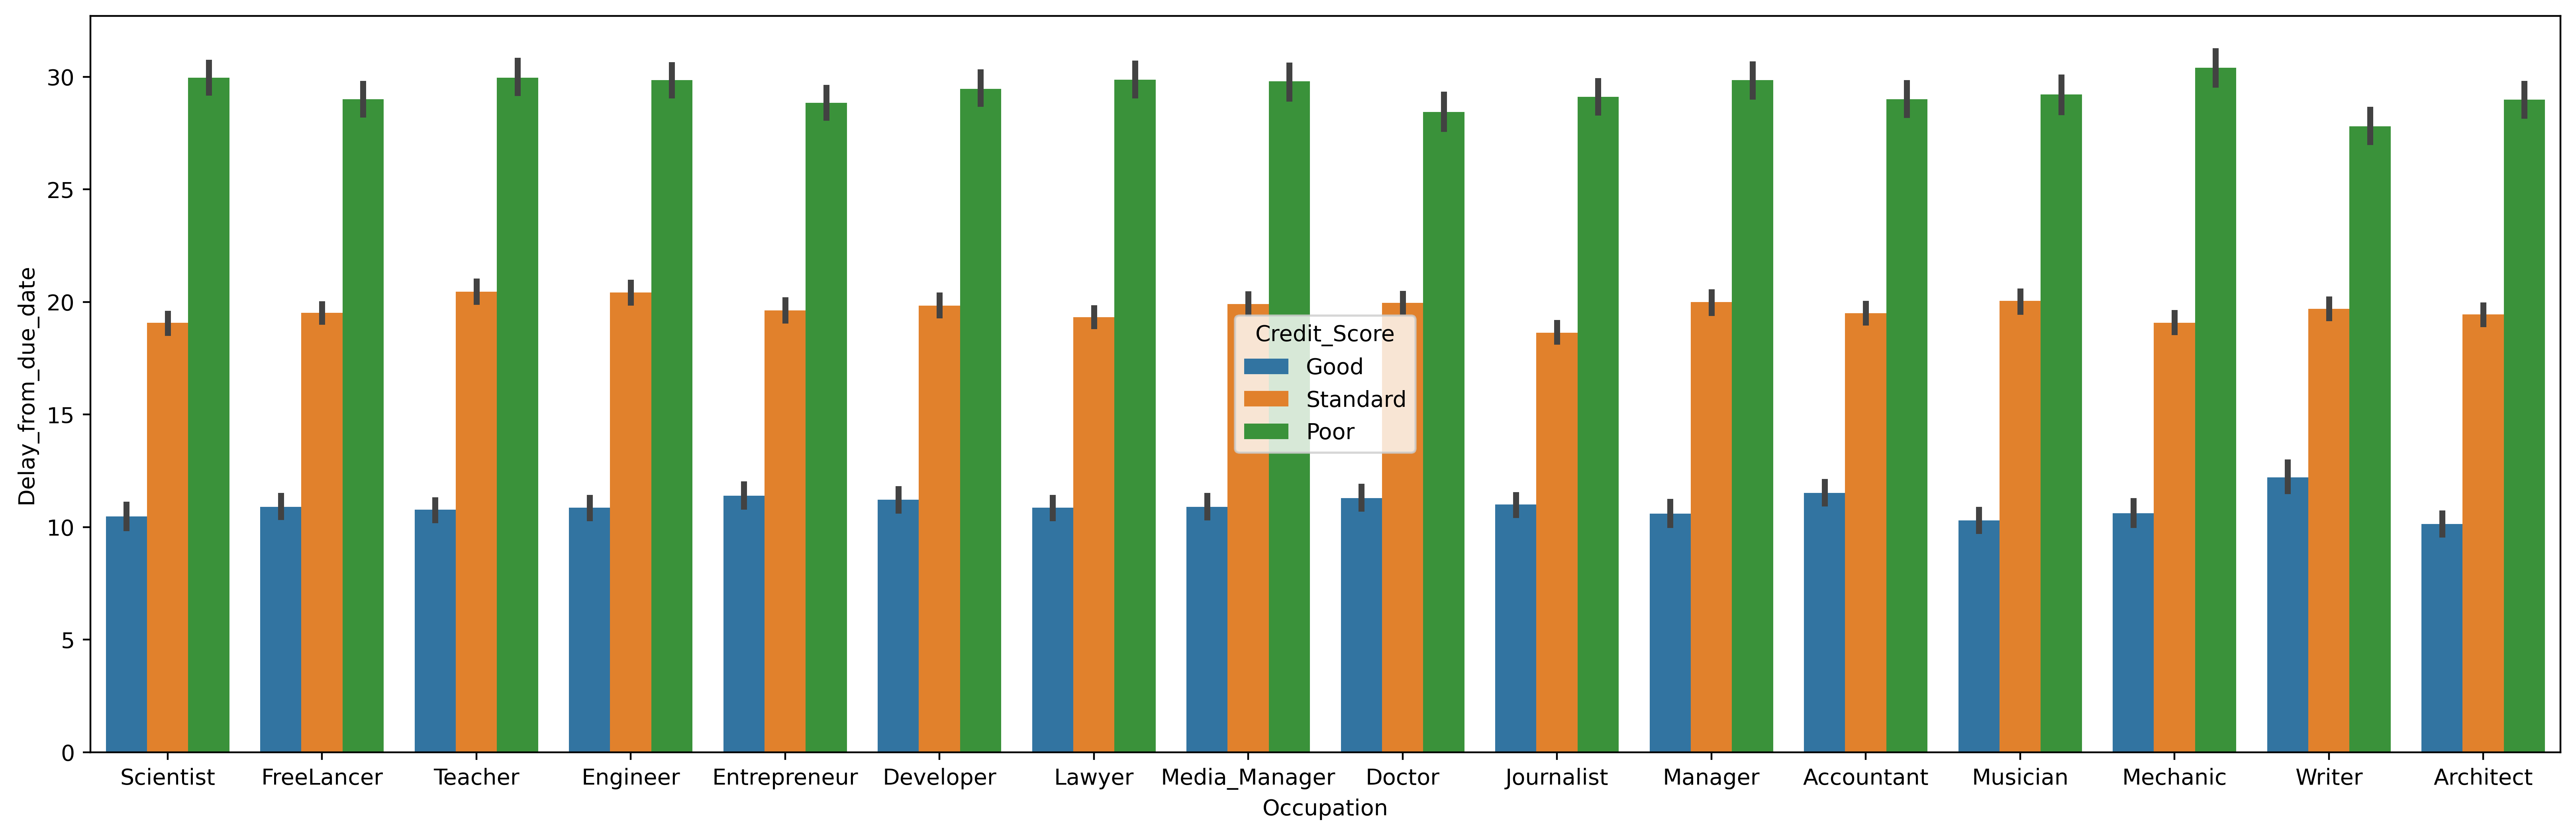

In [95]:
plt.figure(figsize = (20,6), dpi = 400)
sns.barplot(x='Occupation',y='Delay_from_due_date',data =df,hue='Credit_Score')
plt.show()

>- of course if you delay from paying your loans that weaken your credit score

# Num_of_Delayed_Payment

In [96]:
df['Num_of_Delayed_Payment'].unique()

array(['7', nan, '4', '8_', '6', '1', '-1', '3_', '0', '8', '5', '3', '9',
       '12', '15', '17', '10', '2', '2_', '11', '14', '20', '22', '13',
       '13_', '14_', '16', '12_', '18', '19', '23', '24', '21', '3318',
       '3083', '22_', '1338', '4_', '26', '11_', '3104', '21_', '25',
       '10_', '183_', '9_', '1106', '834', '19_', '24_', '17_', '23_',
       '2672', '20_', '2008', '-3', '538', '6_', '1_', '16_', '27', '-2',
       '3478', '2420', '15_', '707', '708', '26_', '18_', '3815', '28',
       '5_', '1867', '2250', '1463', '25_', '7_', '4126', '2882', '1941',
       '2655', '2628', '132', '3069', '306', '0_', '3539', '3684', '1823',
       '4128', '1946', '827', '2297', '2566', '904', '182', '929', '3568',
       '2503', '1552', '2812', '1697', '3764', '851', '3905', '923', '88',
       '1668', '3253', '808', '2689', '3858', '642', '3457', '1402',
       '1732', '3154', '847', '3037', '2204', '3103', '1063', '2056',
       '1282', '1841', '2569_', '211', '793', '3484', '4

In [97]:
df['Num_of_Delayed_Payment'].isna().sum()

7002

we have special characters and nan values so we have to fix them

In [98]:
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].str.replace('-','')
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].str.replace('_','')
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].astype(float)
imputer = SimpleImputer(missing_values= np.nan,strategy='mean')
df['Num_of_Delayed_Payment'] = imputer.fit_transform(df['Num_of_Delayed_Payment'].values.reshape(-1,1))


In [99]:
df['Num_of_Delayed_Payment'].describe()

count    100000.000000
mean         30.946268
std         217.971811
min           0.000000
25%           9.000000
50%          15.000000
75%          19.000000
max        4397.000000
Name: Num_of_Delayed_Payment, dtype: float64

In [100]:
handle_outliers('Num_of_Delayed_Payment',df)

In [101]:
df['Num_of_Delayed_Payment'].describe()

count    100000.000000
mean         14.722558
std           7.689282
min           0.000000
25%           9.000000
50%          15.000000
75%          19.000000
max          34.000000
Name: Num_of_Delayed_Payment, dtype: float64

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int64  
 1   Age                       100000 non-null  float64
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  float64
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  int32  
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    100000 non-null  float64
 11  Changed_Credit_Limit      100000 non-null  object 
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Credit_Mix                100000 non-null  ob

# Changed_Credit_Limit

In [103]:
df['Changed_Credit_Limit'].unique()

array(['11.27', '_', '6.27', ..., '17.509999999999998', '25.16', '21.17'],
      dtype=object)

In [104]:
df['Changed_Credit_Limit'].nunique()

4384

In [105]:
df['Changed_Credit_Limit'].isnull().sum()

0

In [106]:
df['Changed_Credit_Limit'].value_counts()

_                     2091
8.22                   133
11.5                   127
11.32                  126
7.35                   121
                      ... 
-1.84                    1
0.8899999999999999       1
28.06                    1
1.5599999999999996       1
21.17                    1
Name: Changed_Credit_Limit, Length: 4384, dtype: int64

In [107]:
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].str.replace('-','')
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].str.replace('_','0')
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].astype(float)


In [108]:
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].replace(0,np.nan)
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].replace(np.nan,df['Changed_Credit_Limit'].mean())


<AxesSubplot:xlabel='Changed_Credit_Limit', ylabel='Density'>

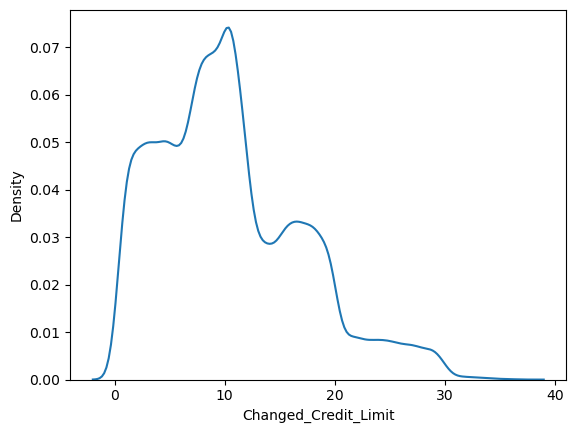

In [109]:
sns.kdeplot(df['Changed_Credit_Limit'])

In [110]:
df['Changed_Credit_Limit'].describe()

count    100000.000000
mean         10.466106
std           6.600289
min           0.010000
25%           5.430000
50%           9.560000
75%          14.660000
max          36.970000
Name: Changed_Credit_Limit, dtype: float64

In [111]:
handle_outliers('Changed_Credit_Limit',df)

In [112]:
df['Changed_Credit_Limit'].describe()

count    100000.000000
mean         10.450217
std           6.553083
min           0.010000
25%           5.430000
50%           9.560000
75%          14.660000
max          28.505000
Name: Changed_Credit_Limit, dtype: float64

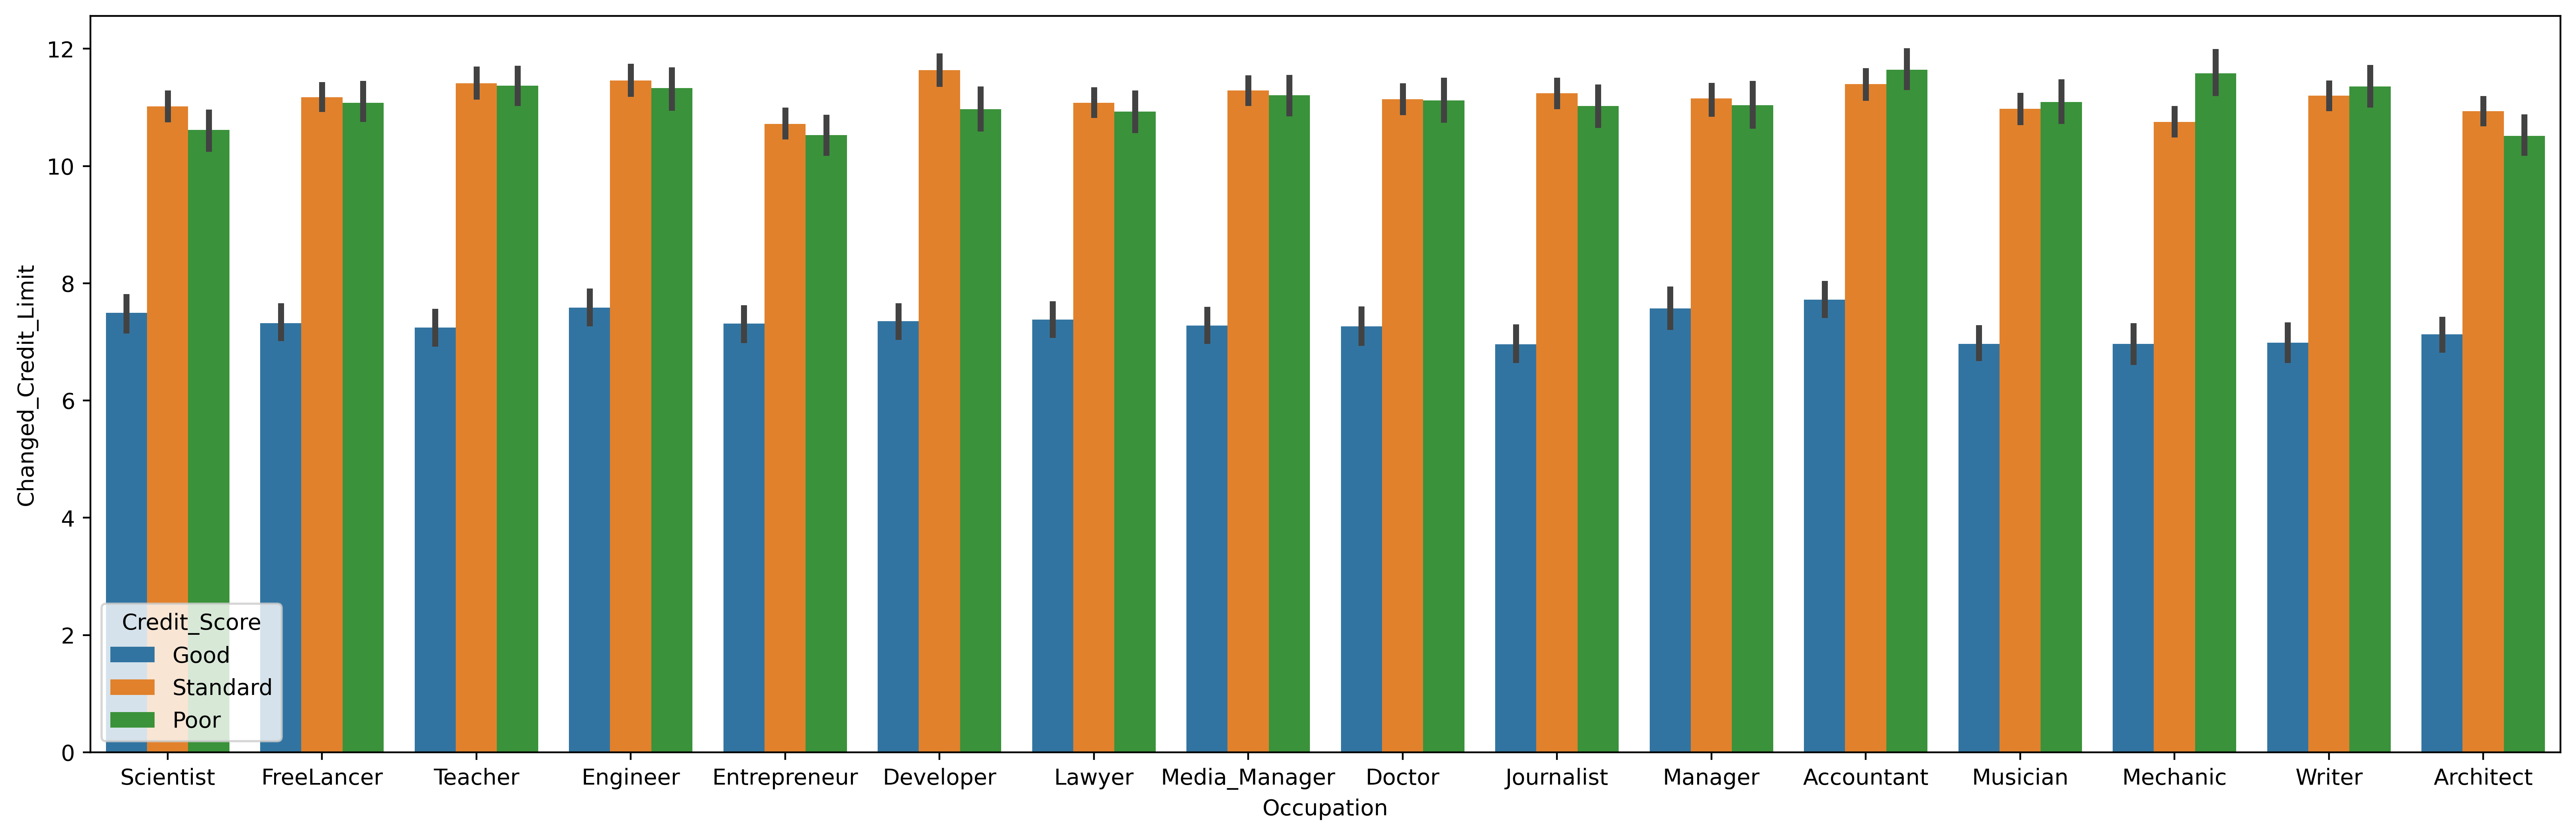

In [113]:
plt.figure(figsize = (20,6), dpi = 400)
sns.barplot(x='Occupation',y='Changed_Credit_Limit',data =df,hue='Credit_Score')
plt.show()

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int64  
 1   Age                       100000 non-null  float64
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  float64
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  int32  
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    100000 non-null  float64
 11  Changed_Credit_Limit      100000 non-null  float64
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Credit_Mix                100000 non-null  ob

# Num_Credit_Inquiries

>- An inquiry refers to a request to look at your credit file, and it generally falls into one of two types.

>- Hard inquiries. These are typically inquiries by lenders after you apply for credit. These inquiries will impact your credit score because most credit scoring models look at how recently and how frequently you apply for credit.

>- Soft inquiries. These are reviews of your credit file, including reviews of existing accounts by lenders, prescreening inquiries by prospective lenders, and your requests for your annual credit report. These will not change your credit score.


In [115]:
df['Num_Credit_Inquiries'].unique()

array([   4.,    2.,    3., ..., 1361.,  310.,   74.])

In [116]:
df['Num_Credit_Inquiries'].value_counts()

4.0       11271
3.0        8890
6.0        8111
7.0        8058
2.0        8028
          ...  
1721.0        1
1750.0        1
2397.0        1
621.0         1
74.0          1
Name: Num_Credit_Inquiries, Length: 1223, dtype: int64

In [117]:
df['Num_Credit_Inquiries'].isna().sum()

1965

In [118]:
df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].replace(np.nan,df['Num_Credit_Inquiries'].mean())
df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].astype(int)

<AxesSubplot:xlabel='Num_Credit_Inquiries', ylabel='Density'>

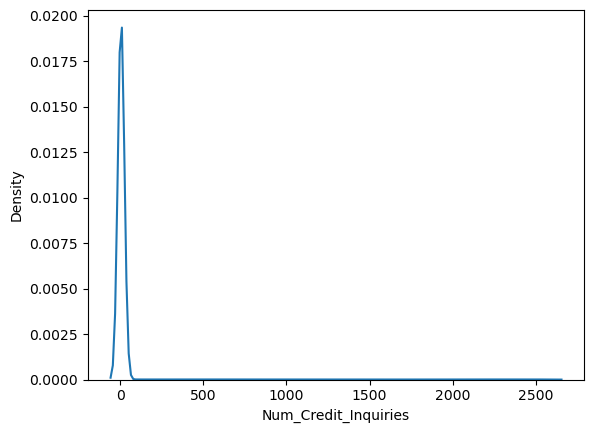

In [119]:
sns.kdeplot(df['Num_Credit_Inquiries'])

In [120]:
df['Num_Credit_Inquiries'].describe()

count    100000.000000
mean         27.739430
std         191.269965
min           0.000000
25%           3.000000
50%           6.000000
75%           9.000000
max        2597.000000
Name: Num_Credit_Inquiries, dtype: float64

In [121]:
handle_outliers('Num_Credit_Inquiries',df)

In [122]:
df['Num_Credit_Inquiries'].describe()

count    100000.000000
mean          6.222830
std           4.423624
min           0.000000
25%           3.000000
50%           6.000000
75%           9.000000
max          18.000000
Name: Num_Credit_Inquiries, dtype: float64

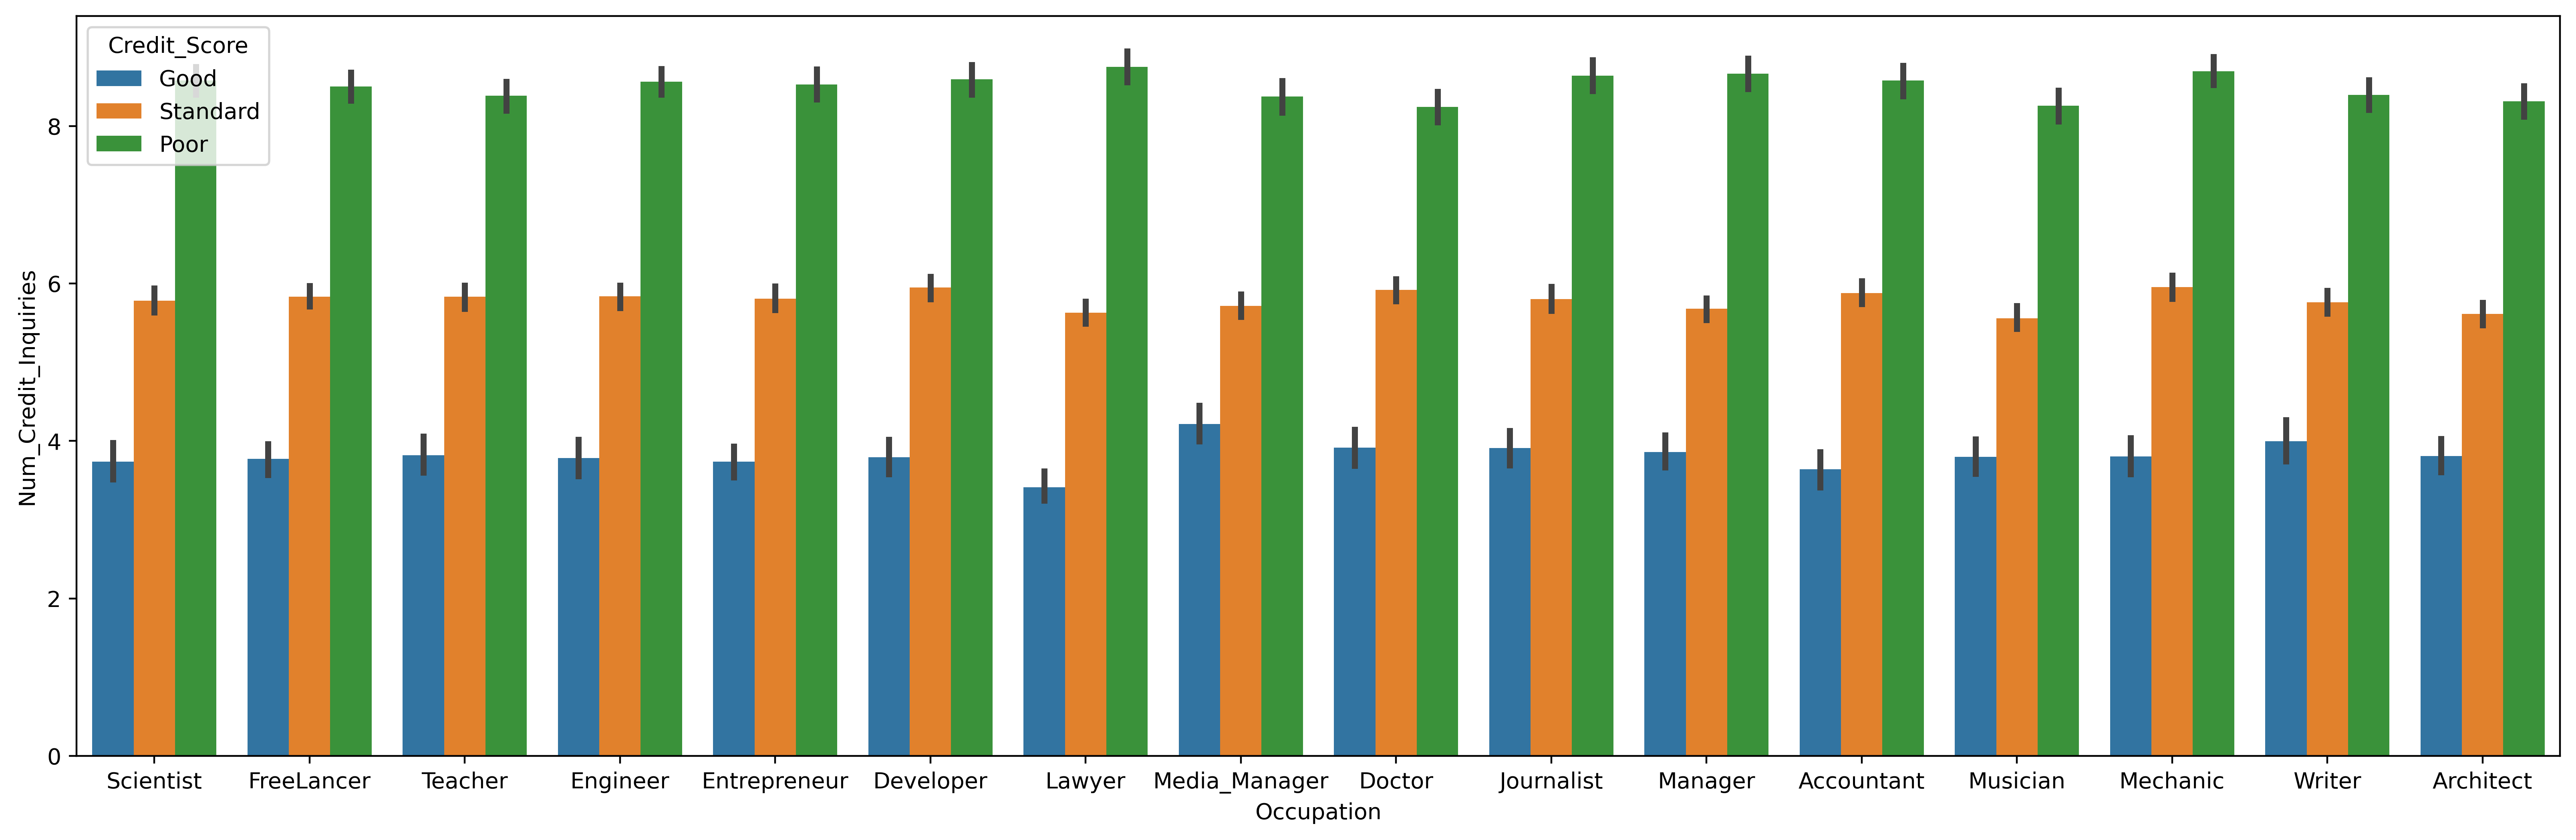

In [123]:
plt.figure(figsize = (20,6), dpi = 400)
sns.barplot(x='Occupation',y='Num_Credit_Inquiries',data =df,hue='Credit_Score')
plt.show()

# Credit_Mix

>- A credit mix refers to the different types of credit accounts you have. The impact of a credit mix on your credit scores varies, depending on the credit scoring model used. Lenders and creditors generally want to know how you have managed different types of accounts over time.

In [124]:
df['Credit_Mix'].value_counts()

Standard    36479
Good        24337
_           20195
Bad         18989
Name: Credit_Mix, dtype: int64

In [125]:
df['Credit_Score'].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

<AxesSubplot:xlabel='Credit_Score', ylabel='count'>

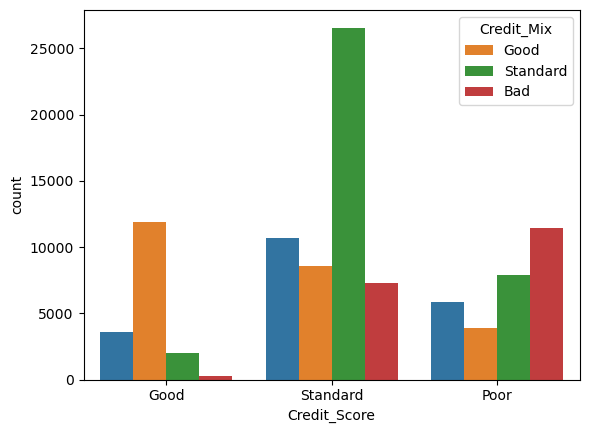

In [126]:
sns.countplot(df['Credit_Score'],hue=df['Credit_Mix'])

>- i will assume that credit mix and credit score are very correlated 

In [127]:
for i in df.index:
    if df.loc[i,'Credit_Mix'] == '_' :
        if df.loc[i,'Credit_Score'] == 'Standard':
            df.loc[i,'Credit_Mix']= df.loc[i,'Credit_Mix'].replace('_','Standard')
        elif df.loc[i,'Credit_Score'] == 'Poor':
            df.loc[i,'Credit_Mix']= df.loc[i,'Credit_Mix'].replace('_','Bad')
        elif df.loc[i,'Credit_Score'] == 'Good':
            df.loc[i,'Credit_Mix']= df.loc[i,'Credit_Mix'].replace('_','Good')
        


In [128]:
df['Credit_Mix'].value_counts()

Standard    47183
Good        27959
Bad         24858
Name: Credit_Mix, dtype: int64

<AxesSubplot:xlabel='Credit_Score', ylabel='count'>

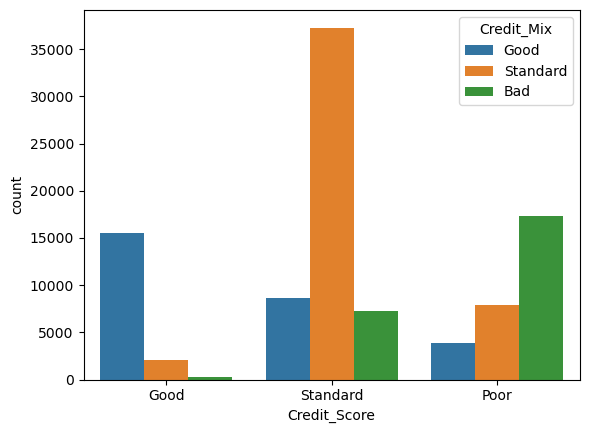

In [129]:
sns.countplot(df['Credit_Score'],hue=df['Credit_Mix'])

>- This an ordinal data so we can use label encoder

In [130]:
df['Credit_Mix'] = df['Credit_Mix'].map({'Bad':0,'Standard':1,'Good':2})


In [131]:
df['Credit_Mix'].value_counts()

1    47183
2    27959
0    24858
Name: Credit_Mix, dtype: int64

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int64  
 1   Age                       100000 non-null  float64
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  float64
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  int32  
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    100000 non-null  float64
 11  Changed_Credit_Limit      100000 non-null  float64
 12  Num_Credit_Inquiries      100000 non-null  int32  
 13  Credit_Mix                100000 non-null  in

# Outstanding_Debt

>- Outstanding debt, defined as the total principal as well as interest amount of a debt that has yet to be paid, is of core importance for any company which has used debt financing. It is important because it expresses a dollar amount to be paid before a liability is closed.

In [133]:
df['Outstanding_Debt'].unique()

array(['809.98', '605.03', '1303.01', ..., '3571.7_', '3571.7', '502.38'],
      dtype=object)

In [134]:
df['Outstanding_Debt'] = df['Outstanding_Debt'].str.replace('_','')
df['Outstanding_Debt'] = df['Outstanding_Debt'].str.replace('-','')
df['Outstanding_Debt'] = df['Outstanding_Debt'].astype(float)

In [135]:
df['Outstanding_Debt'].unique()

array([ 809.98,  605.03, 1303.01, ...,  620.64, 3571.7 ,  502.38])

In [136]:
df['Outstanding_Debt'].describe()

count    100000.000000
mean       1426.220376
std        1155.129026
min           0.230000
25%         566.072500
50%        1166.155000
75%        1945.962500
max        4998.070000
Name: Outstanding_Debt, dtype: float64

<AxesSubplot:xlabel='Outstanding_Debt', ylabel='Density'>

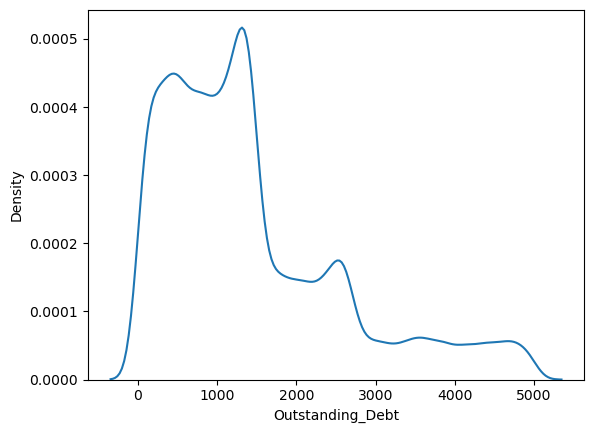

In [137]:
sns.kdeplot(df['Outstanding_Debt'])

In [138]:
handle_outliers('Outstanding_Debt',df)

In [139]:
df['Outstanding_Debt'].describe()

count    100000.000000
mean       1399.859920
std        1086.193704
min           0.230000
25%         566.072500
50%        1166.155000
75%        1945.962500
max        4015.797500
Name: Outstanding_Debt, dtype: float64

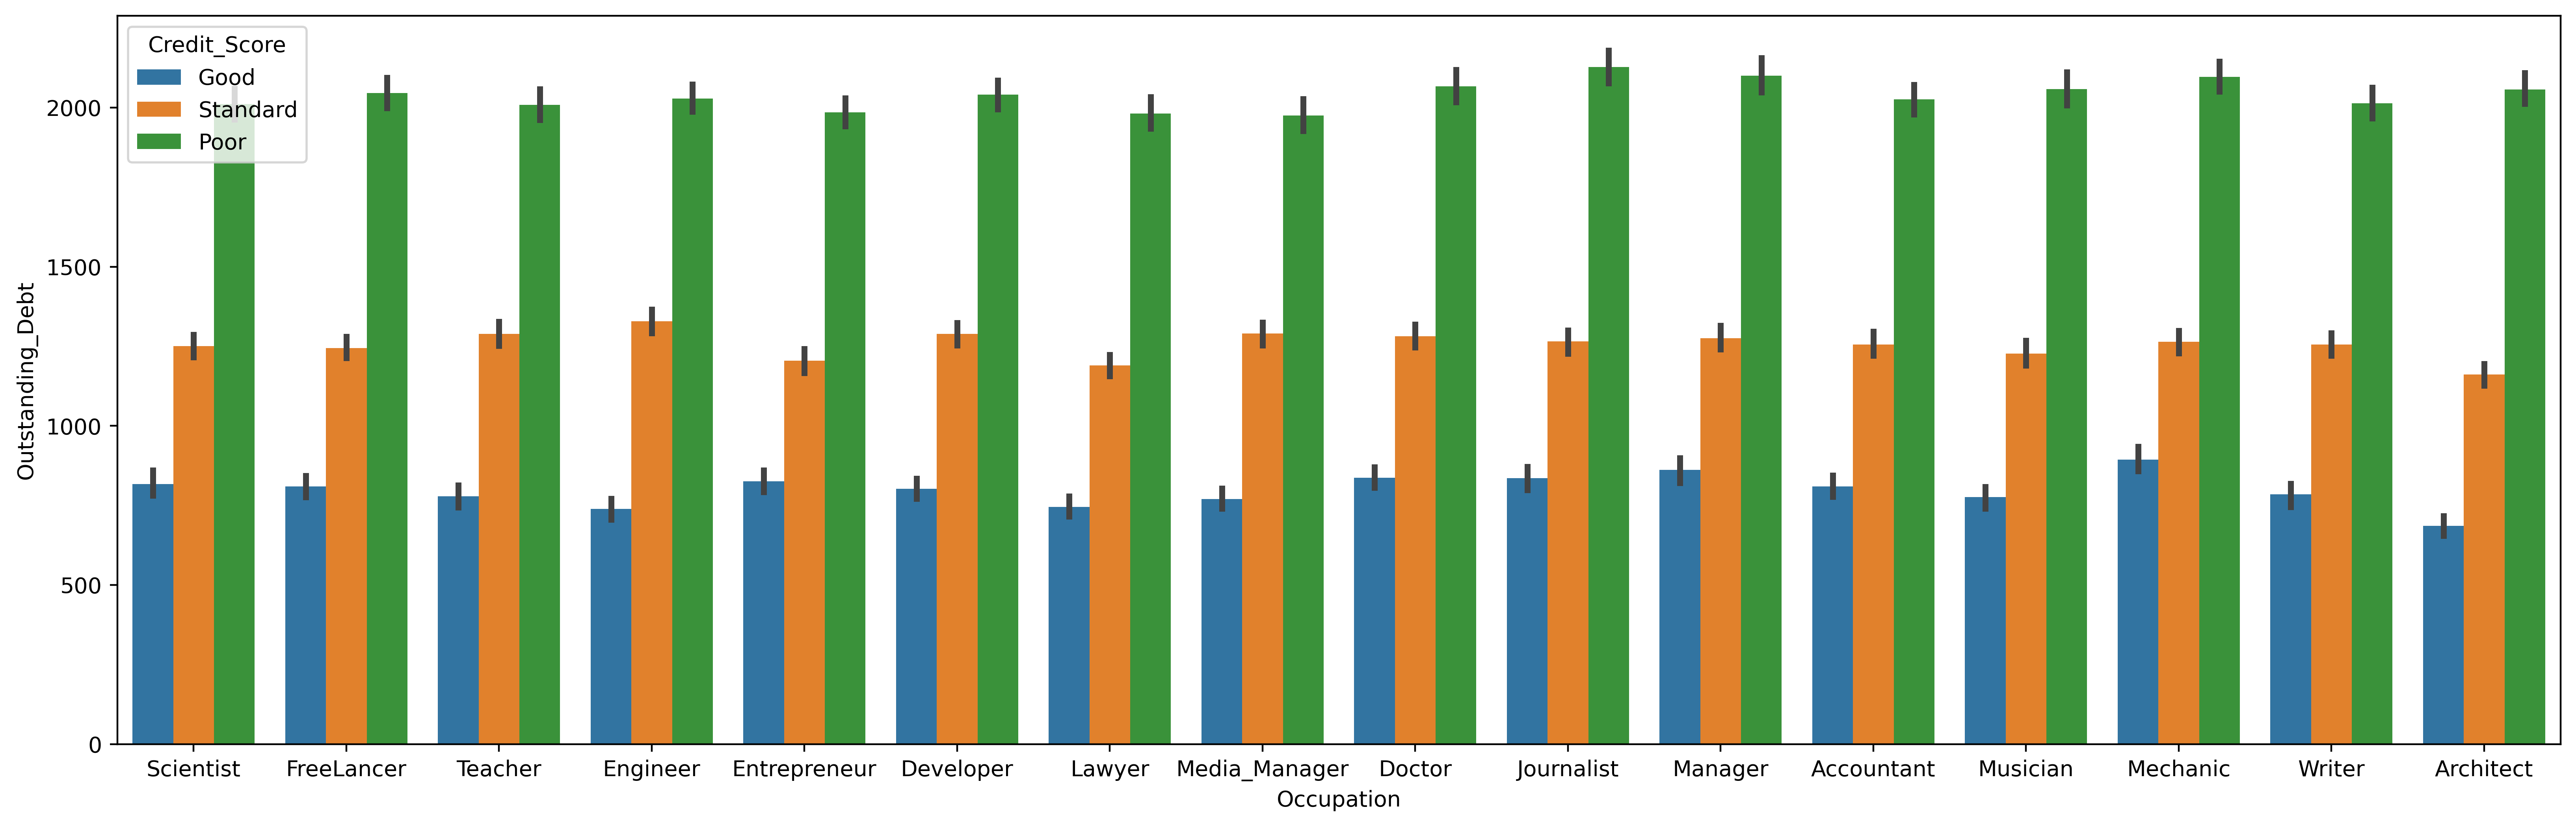

In [140]:
plt.figure(figsize = (20,6), dpi = 400)
sns.barplot(x='Occupation',y='Outstanding_Debt',data =df,hue='Credit_Score')
plt.show()

>- Credit Score decrease due to high debt

# Credit_Utilization_Ratio

>- Your credit utilization ratio, generally expressed as a percentage, represents the amount of revolving credit you're using divided by the total credit available to you. Lenders use your credit utilization ratio to help determine how well you're managing your current debt.

In [141]:
df['Credit_Utilization_Ratio'].describe()

count    100000.000000
mean         32.285173
std           5.116875
min          20.000000
25%          28.052567
50%          32.305784
75%          36.496663
max          50.000000
Name: Credit_Utilization_Ratio, dtype: float64

In [142]:
check_outliers('Credit_Utilization_Ratio',df)

[50.00000000000001, 49.52232429787243, 49.25498297529708, 49.56451934738699]

In [143]:
handle_outliers('Credit_Utilization_Ratio',df)

In [144]:
check_outliers('Credit_Utilization_Ratio',df)

[]

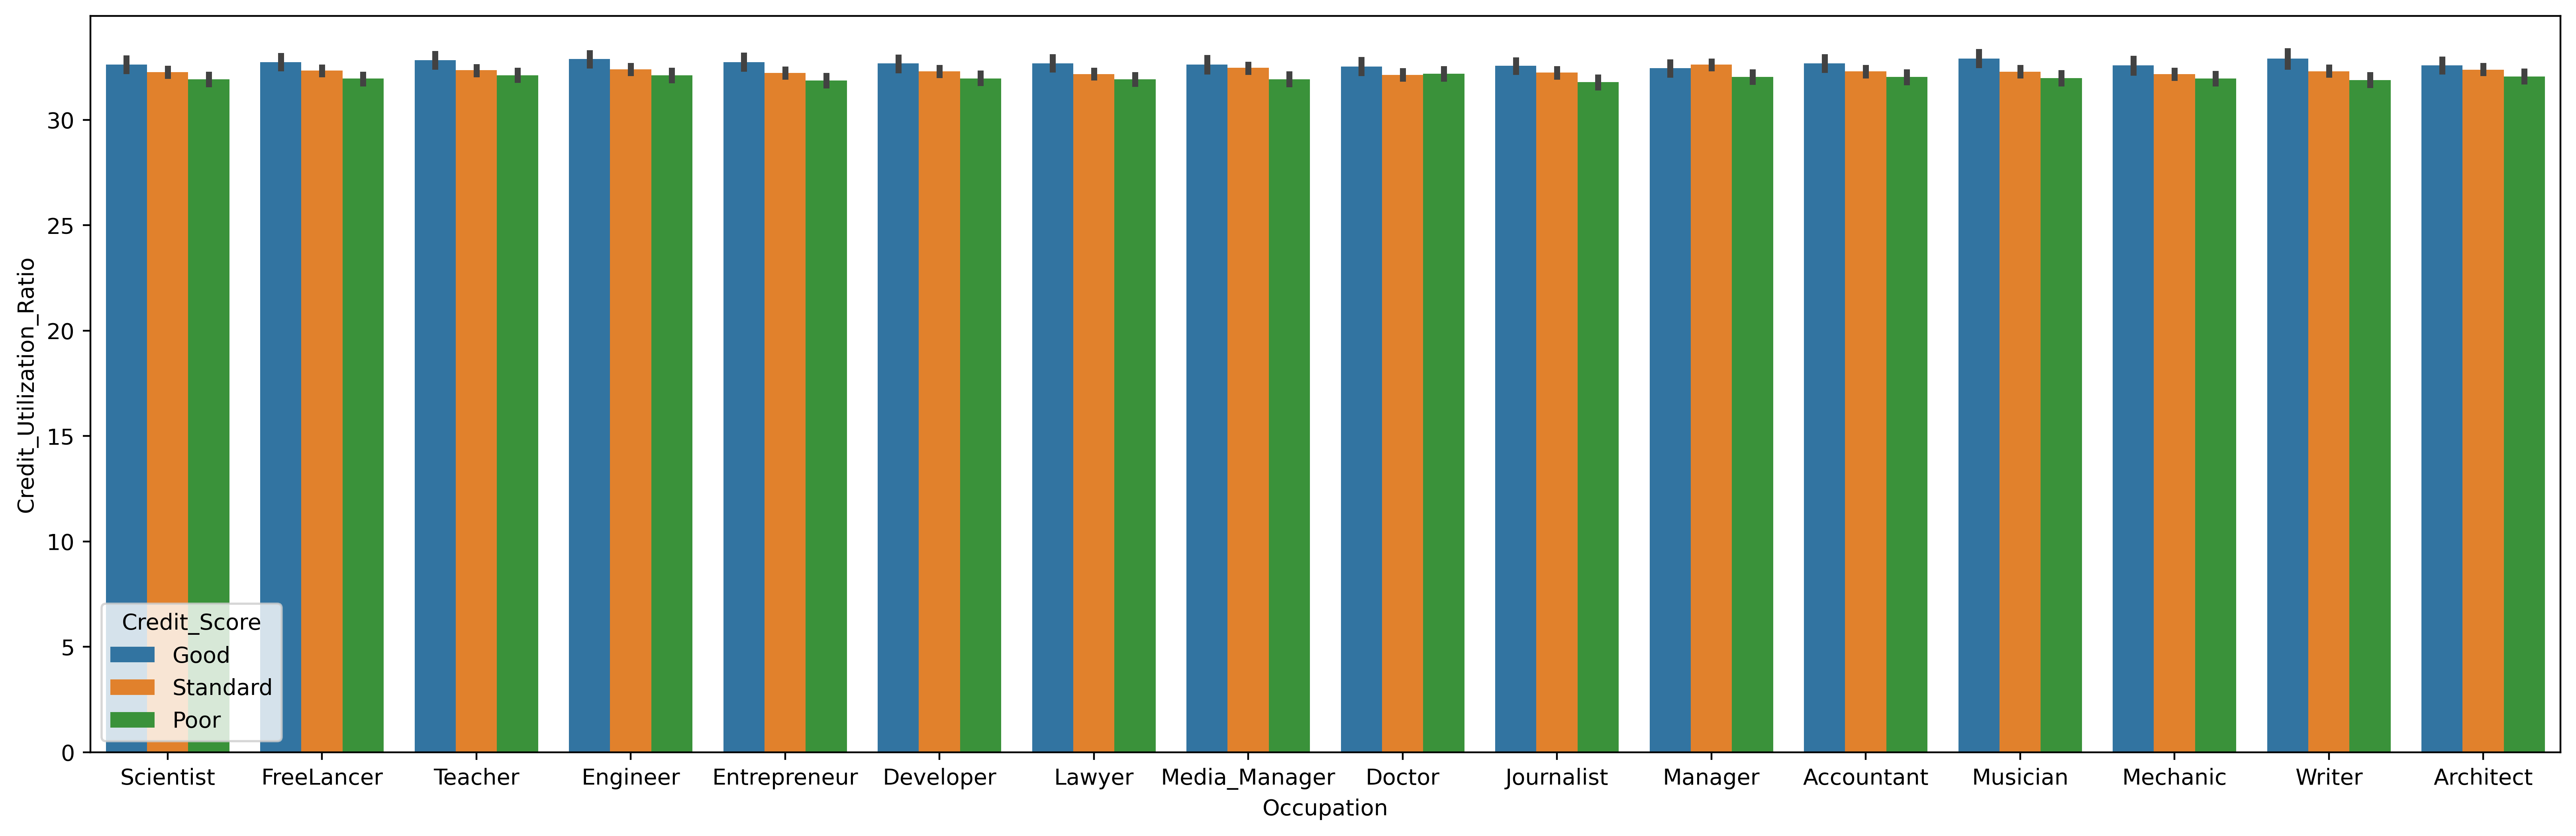

In [145]:
plt.figure(figsize = (20,6), dpi = 400)
sns.barplot(x='Occupation',y='Credit_Utilization_Ratio',data =df,hue='Credit_Score')
plt.show()

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int64  
 1   Age                       100000 non-null  float64
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  float64
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  int32  
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    100000 non-null  float64
 11  Changed_Credit_Limit      100000 non-null  float64
 12  Num_Credit_Inquiries      100000 non-null  int32  
 13  Credit_Mix                100000 non-null  in

# Credit_History_Age

>- What is the “age” of credit history? The age of your credit is the average time your credit accounts have been open. The longer your account history, the better your credit score gets—assuming other aspects of your credit score are in good standing.

In [147]:
df['Credit_History_Age'].unique()

array(['22 Years and 1 Months', nan, '22 Years and 3 Months',
       '22 Years and 4 Months', '22 Years and 5 Months',
       '22 Years and 6 Months', '22 Years and 7 Months',
       '26 Years and 7 Months', '26 Years and 8 Months',
       '26 Years and 9 Months', '26 Years and 10 Months',
       '26 Years and 11 Months', '27 Years and 0 Months',
       '27 Years and 1 Months', '27 Years and 2 Months',
       '17 Years and 9 Months', '17 Years and 10 Months',
       '17 Years and 11 Months', '18 Years and 1 Months',
       '18 Years and 2 Months', '18 Years and 3 Months',
       '18 Years and 4 Months', '17 Years and 3 Months',
       '17 Years and 4 Months', '17 Years and 5 Months',
       '17 Years and 6 Months', '17 Years and 7 Months',
       '17 Years and 8 Months', '30 Years and 8 Months',
       '30 Years and 9 Months', '30 Years and 10 Months',
       '30 Years and 11 Months', '31 Years and 0 Months',
       '31 Years and 1 Months', '31 Years and 2 Months',
       '31 Years and

In [148]:
df['Credit_History_Age'].isna().sum()

9030

In [149]:
imputer = SimpleImputer(missing_values= np.nan,strategy='most_frequent')
df['Credit_History_Age'] = imputer.fit_transform(df['Credit_History_Age'].values.reshape(-1,1))


In [150]:
df['Credit_History_Years'],df['Credit_History_Months']=df['Credit_History_Age'].str.split('and',2).str


In [151]:
df.drop('Credit_History_Age',axis=1,inplace=True)


In [152]:
df['Credit_History_Years'] = df['Credit_History_Years'].str.replace('Years','')
df['Credit_History_Months'] = df['Credit_History_Months'].str.replace('Months','')

In [153]:
df['Credit_History_Years'] = df['Credit_History_Years'].astype(int)
df['Credit_History_Months'] = df['Credit_History_Months'].astype(int)

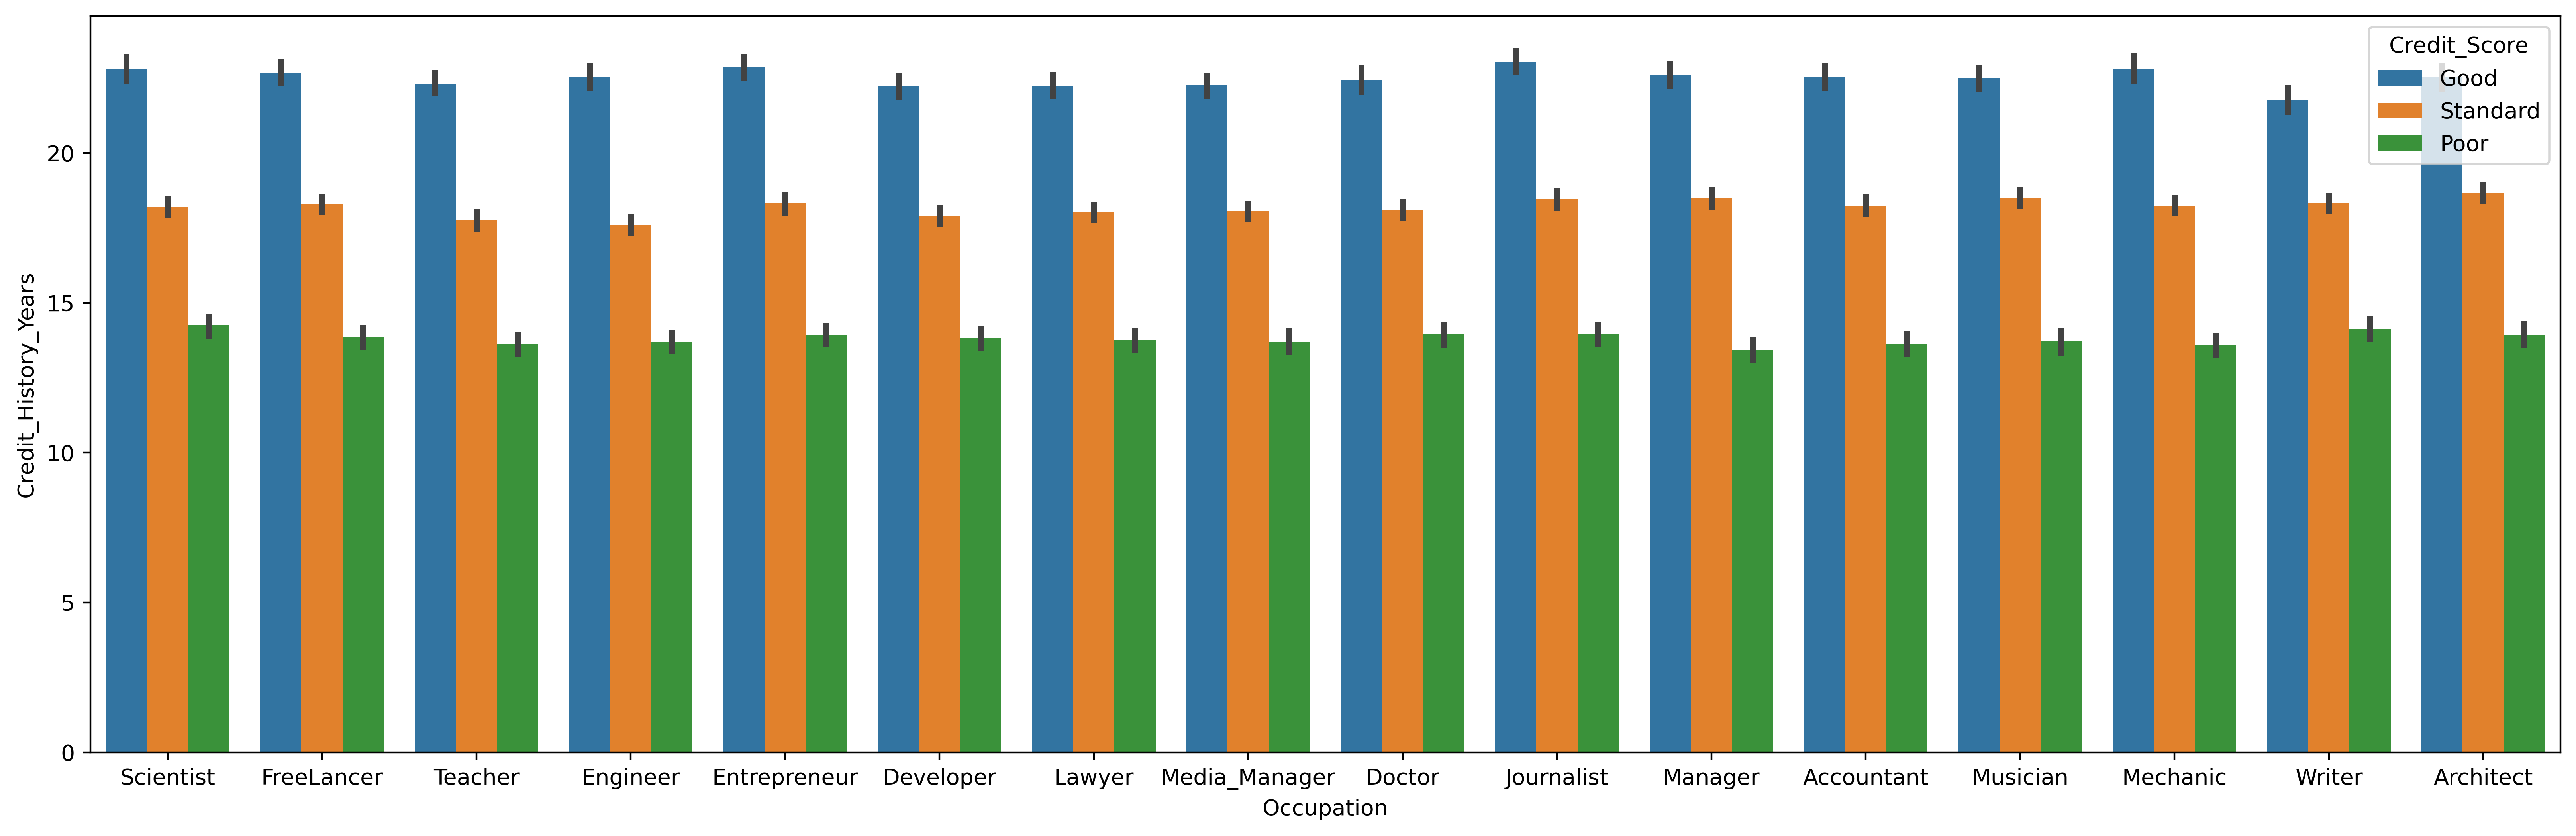

In [154]:
plt.figure(figsize = (20,6), dpi = 400)
sns.barplot(x='Occupation',y='Credit_History_Years',data =df,hue='Credit_Score')
plt.show()

>- The longer your history, the better your credit score

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 32 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int64  
 1   Age                       100000 non-null  float64
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  float64
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  int32  
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    100000 non-null  float64
 11  Changed_Credit_Limit      100000 non-null  float64
 12  Num_Credit_Inquiries      100000 non-null  int32  
 13  Credit_Mix                100000 non-null  in

# Payment_of_Min_Amount

>- The minimum payment is the smallest amount of money that you have to pay each month to keep your account in good standing. The statement balance is the total balance on your account for that billing cycle.

In [156]:
df['Payment_of_Min_Amount'].unique()

array(['No', 'NM', 'Yes'], dtype=object)

In [157]:
df['Payment_of_Min_Amount'].value_counts()

Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64

In [158]:
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].map({'No':0,'NM':1,'Yes':2})


In [159]:
df['Payment_of_Min_Amount'].value_counts()

2    52326
0    35667
1    12007
Name: Payment_of_Min_Amount, dtype: int64

# Total_EMI_per_month

>- Equated Monthly Installment (EMI) Formula
The EMI flat-rate formula is calculated by adding together the principal loan amount and the interest on the principal and dividing the result by the number of periods multiplied by the number of months.

In [160]:
df['Total_EMI_per_month'].describe()

count    100000.000000
mean       1403.118217
std        8306.041270
min           0.000000
25%          30.306660
50%          69.249473
75%         161.224249
max       82331.000000
Name: Total_EMI_per_month, dtype: float64

In [161]:
df['Total_EMI_per_month'].isna().sum()

0

In [162]:
handle_outliers('Total_EMI_per_month',df)

In [163]:
df['Total_EMI_per_month'].describe()

count    100000.000000
mean        108.054040
std         104.531770
min           0.000000
25%          30.306660
50%          69.249473
75%         161.224249
max         357.600632
Name: Total_EMI_per_month, dtype: float64

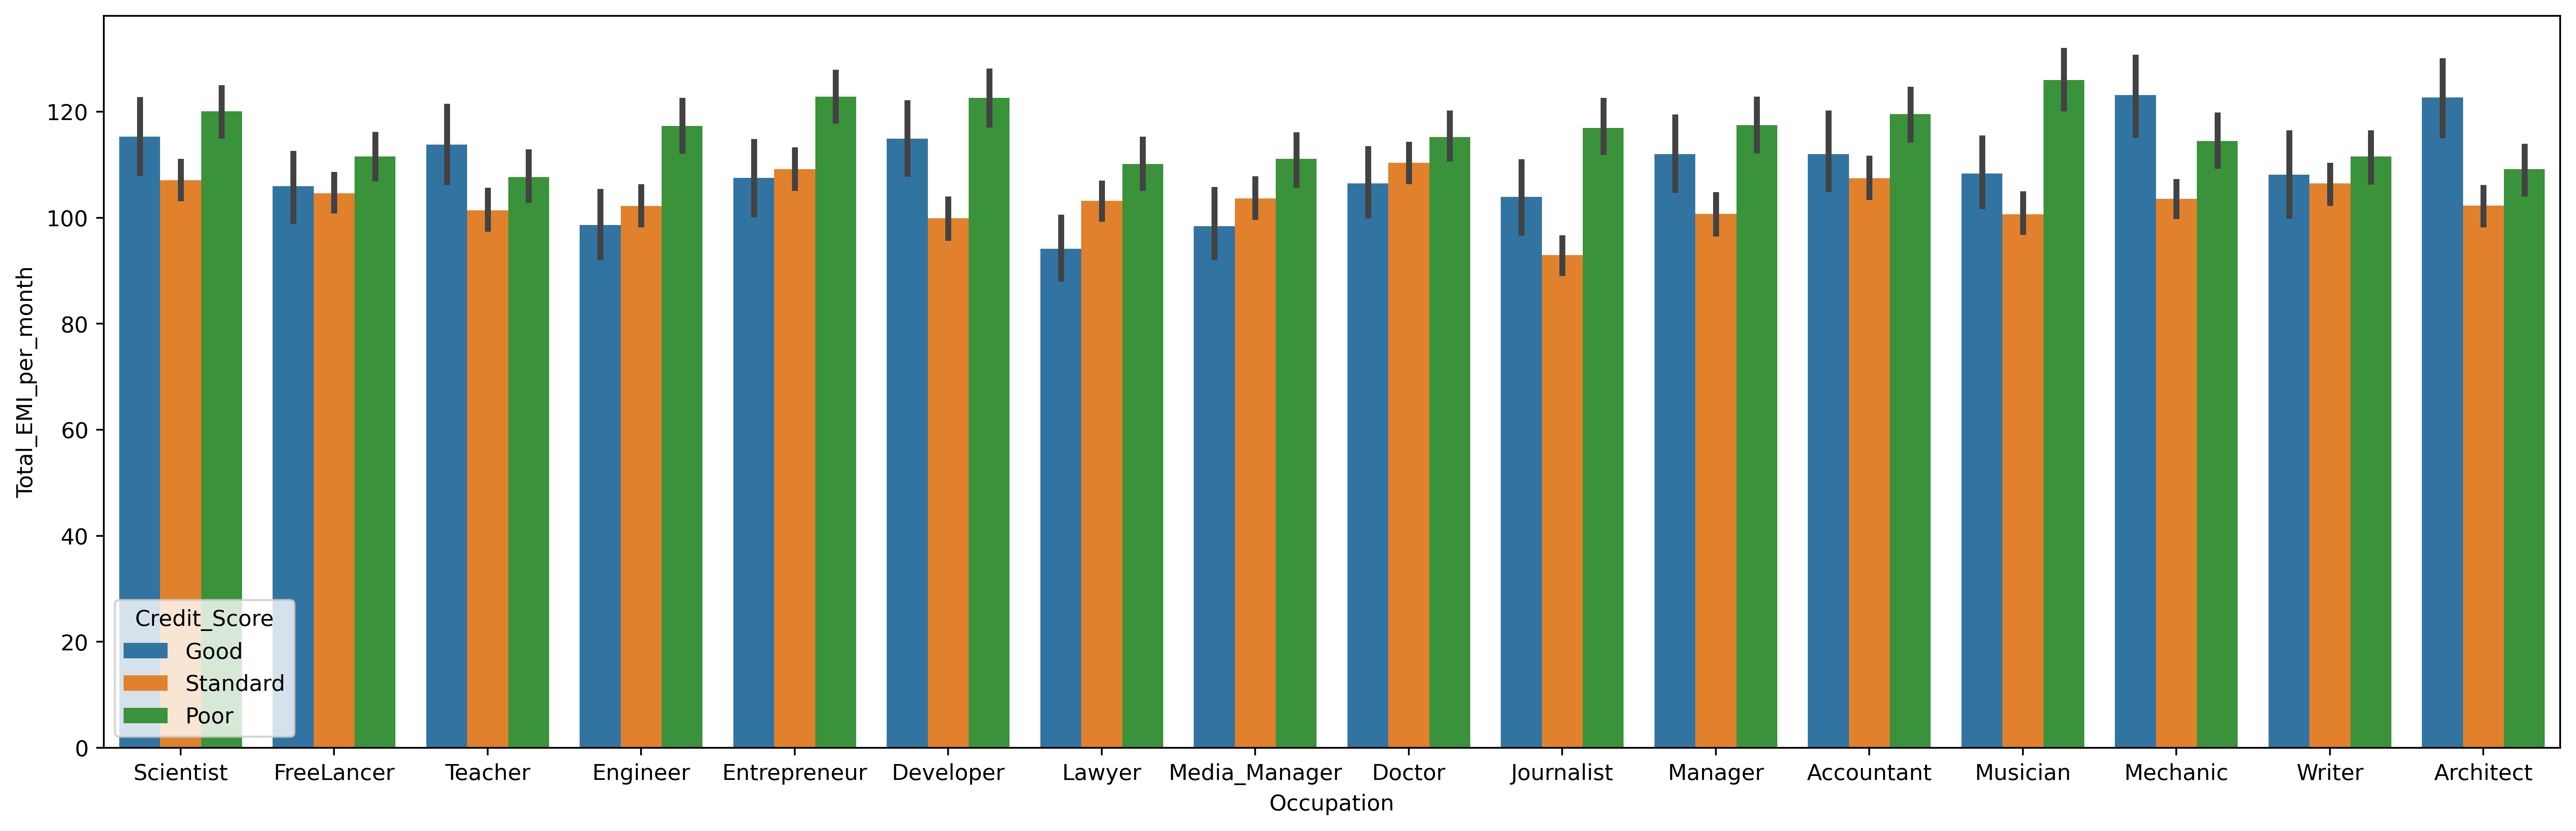

In [164]:
plt.figure(figsize = (20,6), dpi = 400)
sns.barplot(x='Occupation',y='Total_EMI_per_month',data =df,hue='Credit_Score')
plt.show()

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 32 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int64  
 1   Age                       100000 non-null  float64
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  float64
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  int32  
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    100000 non-null  float64
 11  Changed_Credit_Limit      100000 non-null  float64
 12  Num_Credit_Inquiries      100000 non-null  int32  
 13  Credit_Mix                100000 non-null  in

# Amount_invested_monthly

In [166]:
df['Amount_invested_monthly'].unique()

array(['80.41529543900253', '118.28022162236736', '81.699521264648', ...,
       '24.02847744864441', '251.67258219721603', '167.1638651610451'],
      dtype=object)

In [167]:
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].str.replace('_','')
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].astype(float)

In [168]:
df['Amount_invested_monthly'].isnull().sum()

4479

In [169]:
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
df['Amount_invested_monthly'] = imputer.fit_transform(df['Amount_invested_monthly'].values.reshape(-1,1))

In [170]:
df['Amount_invested_monthly'].describe()

count    100000.000000
mean        637.412998
std        1997.034517
min           0.000000
25%          77.017414
50%         143.127915
75%         304.765600
max       10000.000000
Name: Amount_invested_monthly, dtype: float64

In [171]:
df['Amount_invested_monthly'].isnull().sum()

0

In [172]:
handle_outliers('Amount_invested_monthly',df)

In [173]:
df['Amount_invested_monthly'].describe()

count    100000.000000
mean        225.529935
std         201.530586
min           0.000000
25%          77.017414
50%         143.127915
75%         304.765600
max         646.387878
Name: Amount_invested_monthly, dtype: float64

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 32 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int64  
 1   Age                       100000 non-null  float64
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  float64
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  int32  
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    100000 non-null  float64
 11  Changed_Credit_Limit      100000 non-null  float64
 12  Num_Credit_Inquiries      100000 non-null  int32  
 13  Credit_Mix                100000 non-null  in

# Payment_Behaviour

>- What is payment behaviour? Payment behaviour considers the speed at which customers pay invoices, and how this compares to the agreed term

In [175]:
df['Payment_Behaviour'].nunique()

7

In [176]:
df['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', '!@9#%8',
       'High_spent_Large_value_payments'], dtype=object)

In [177]:
df['Payment_Behaviour'].isna().sum()

0

In [178]:
df['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: Payment_Behaviour, dtype: int64

In [179]:
df['Payment_Behaviour'] = df['Payment_Behaviour'].str.replace('!@9#%8','Low_spent_Small_value_payments')

In [180]:
df['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      33113
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
Name: Payment_Behaviour, dtype: int64

In [181]:
df['Customer_spend_behaviour'],_,df['Payment_rate'],_=df['Payment_Behaviour'].str.split('_',3).str


In [182]:
df.drop('Payment_Behaviour',axis=1,inplace = True)

In [183]:
df['Customer_spend_behaviour'].value_counts()

Low     57399
High    42601
Name: Customer_spend_behaviour, dtype: int64

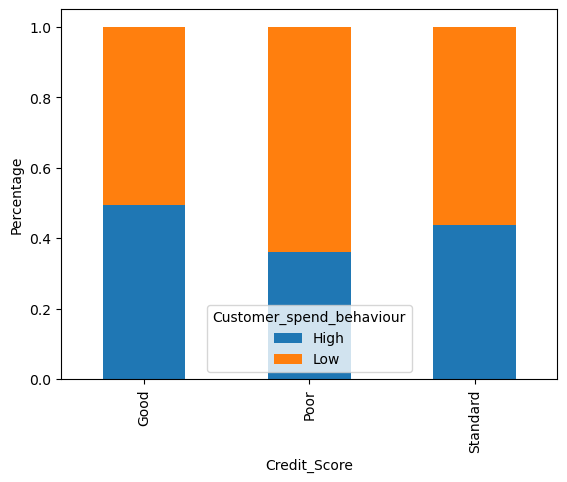

In [184]:
# Group the Customer_spend_behaviour column by Credit_Score and count the number of occurrences
payment_counts = df.groupby('Credit_Score')['Customer_spend_behaviour'].value_counts()

# Reshape the counts into a pivot table with Credit_Score as rows and Customer_spend_behaviour as columns
payment_pivot = payment_counts.unstack()

# Normalize the pivot table to get percentages
payment_pivot = payment_pivot.div(payment_pivot.sum(axis=1), axis=0)

# Create a bar plot of the pivot table
payment_pivot.plot(kind='bar', stacked=True)
plt.xlabel('Credit_Score')
plt.ylabel('Percentage')
plt.show()

In [185]:
df['Customer_spend_behaviour'] = df['Customer_spend_behaviour'].map({'Low':0,'High':1})


In [186]:
df['Payment_rate'].value_counts()

Small     44453
Medium    31401
Large     24146
Name: Payment_rate, dtype: int64

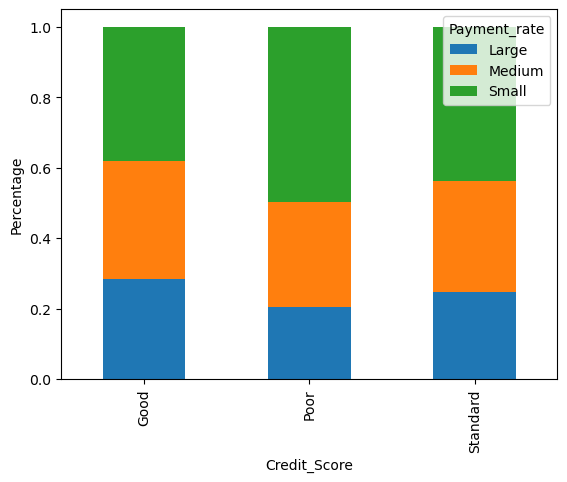

In [187]:
# we apply the same for Payment_rate
payment_counts = df.groupby('Credit_Score')['Payment_rate'].value_counts()

payment_pivot = payment_counts.unstack()

payment_pivot = payment_pivot.div(payment_pivot.sum(axis=1), axis=0)

payment_pivot.plot(kind='bar', stacked=True)
plt.xlabel('Credit_Score')
plt.ylabel('Percentage')
plt.show()

In [188]:
df['Payment_rate'] = df['Payment_rate'].map({'Small':0,'Medium':1,'Large':2})


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 33 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int64  
 1   Age                       100000 non-null  float64
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  float64
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  int32  
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    100000 non-null  float64
 11  Changed_Credit_Limit      100000 non-null  float64
 12  Num_Credit_Inquiries      100000 non-null  int32  
 13  Credit_Mix                100000 non-null  in

# Monthly_Balance

In [190]:
df['Monthly_Balance'].unique()

array(['312.49408867943663', '284.62916249607184', '331.2098628537912',
       ..., 516.8090832742814, 319.1649785257098, 393.6736955618808],
      dtype=object)

In [191]:
df['Monthly_Balance'].isna().sum()

1200

In [192]:
df['Monthly_Balance'] = df['Monthly_Balance'].str.replace('_','')
df['Monthly_Balance'].astype(float)

0        312.494089
1        284.629162
2        331.209863
3        223.451310
4        341.489231
            ...    
99995           NaN
99996           NaN
99997           NaN
99998           NaN
99999           NaN
Name: Monthly_Balance, Length: 100000, dtype: float64

In [193]:
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
df['Monthly_Balance'] = imputer.fit_transform(df['Monthly_Balance'].values.reshape(-1,1))

In [194]:
df['Monthly_Balance'].describe()

count    1.000000e+05
mean    -3.088580e+22
std      3.162147e+24
min     -3.333333e+26
25%      2.645521e+02
50%      3.319282e+02
75%      4.635022e+02
max      1.602041e+03
Name: Monthly_Balance, dtype: float64

In [195]:
handle_outliers('Monthly_Balance',df)

In [196]:
df['Monthly_Balance'].describe()

count    100000.000000
mean        375.229927
std         184.992001
min         -33.872912
25%         264.552132
50%         331.928222
75%         463.502161
max         761.927205
Name: Monthly_Balance, dtype: float64

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 33 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int64  
 1   Age                       100000 non-null  float64
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  float64
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  int32  
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    100000 non-null  float64
 11  Changed_Credit_Limit      100000 non-null  float64
 12  Num_Credit_Inquiries      100000 non-null  int32  
 13  Credit_Mix                100000 non-null  in

# Credit_Score (target)

In [198]:
df = pd.get_dummies(df,columns=['Occupation'],drop_first=True)

In [199]:
df['Credit_Score'].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

In [200]:
df['Credit_Score'] = df['Credit_Score'].map({'Poor':0,'Standard':1,'Good':2})


<AxesSubplot:xlabel='Credit_Score', ylabel='count'>

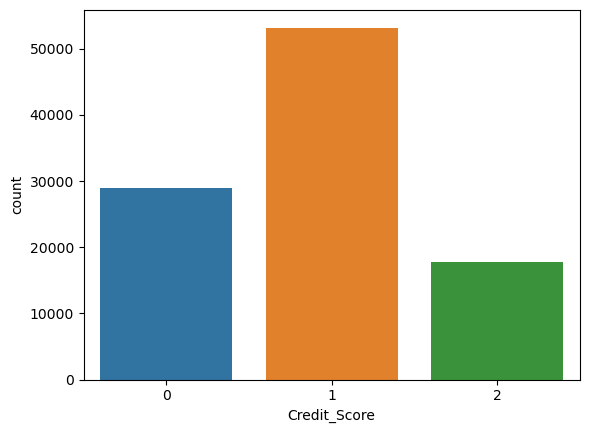

In [201]:
sns.countplot(df['Credit_Score'])

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 47 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int64  
 1   Age                       100000 non-null  float64
 2   Annual_Income             100000 non-null  float64
 3   Monthly_Inhand_Salary     100000 non-null  float64
 4   Num_Bank_Accounts         100000 non-null  int64  
 5   Num_Credit_Card           100000 non-null  float64
 6   Interest_Rate             100000 non-null  int64  
 7   Num_of_Loan               100000 non-null  int32  
 8   Delay_from_due_date       100000 non-null  int64  
 9   Num_of_Delayed_Payment    100000 non-null  float64
 10  Changed_Credit_Limit      100000 non-null  float64
 11  Num_Credit_Inquiries      100000 non-null  int32  
 12  Credit_Mix                100000 non-null  int64  
 13  Outstanding_Debt          100000 non-null  fl

# Machine Learning

# Feature Selecion

# Correlation

<AxesSubplot:>

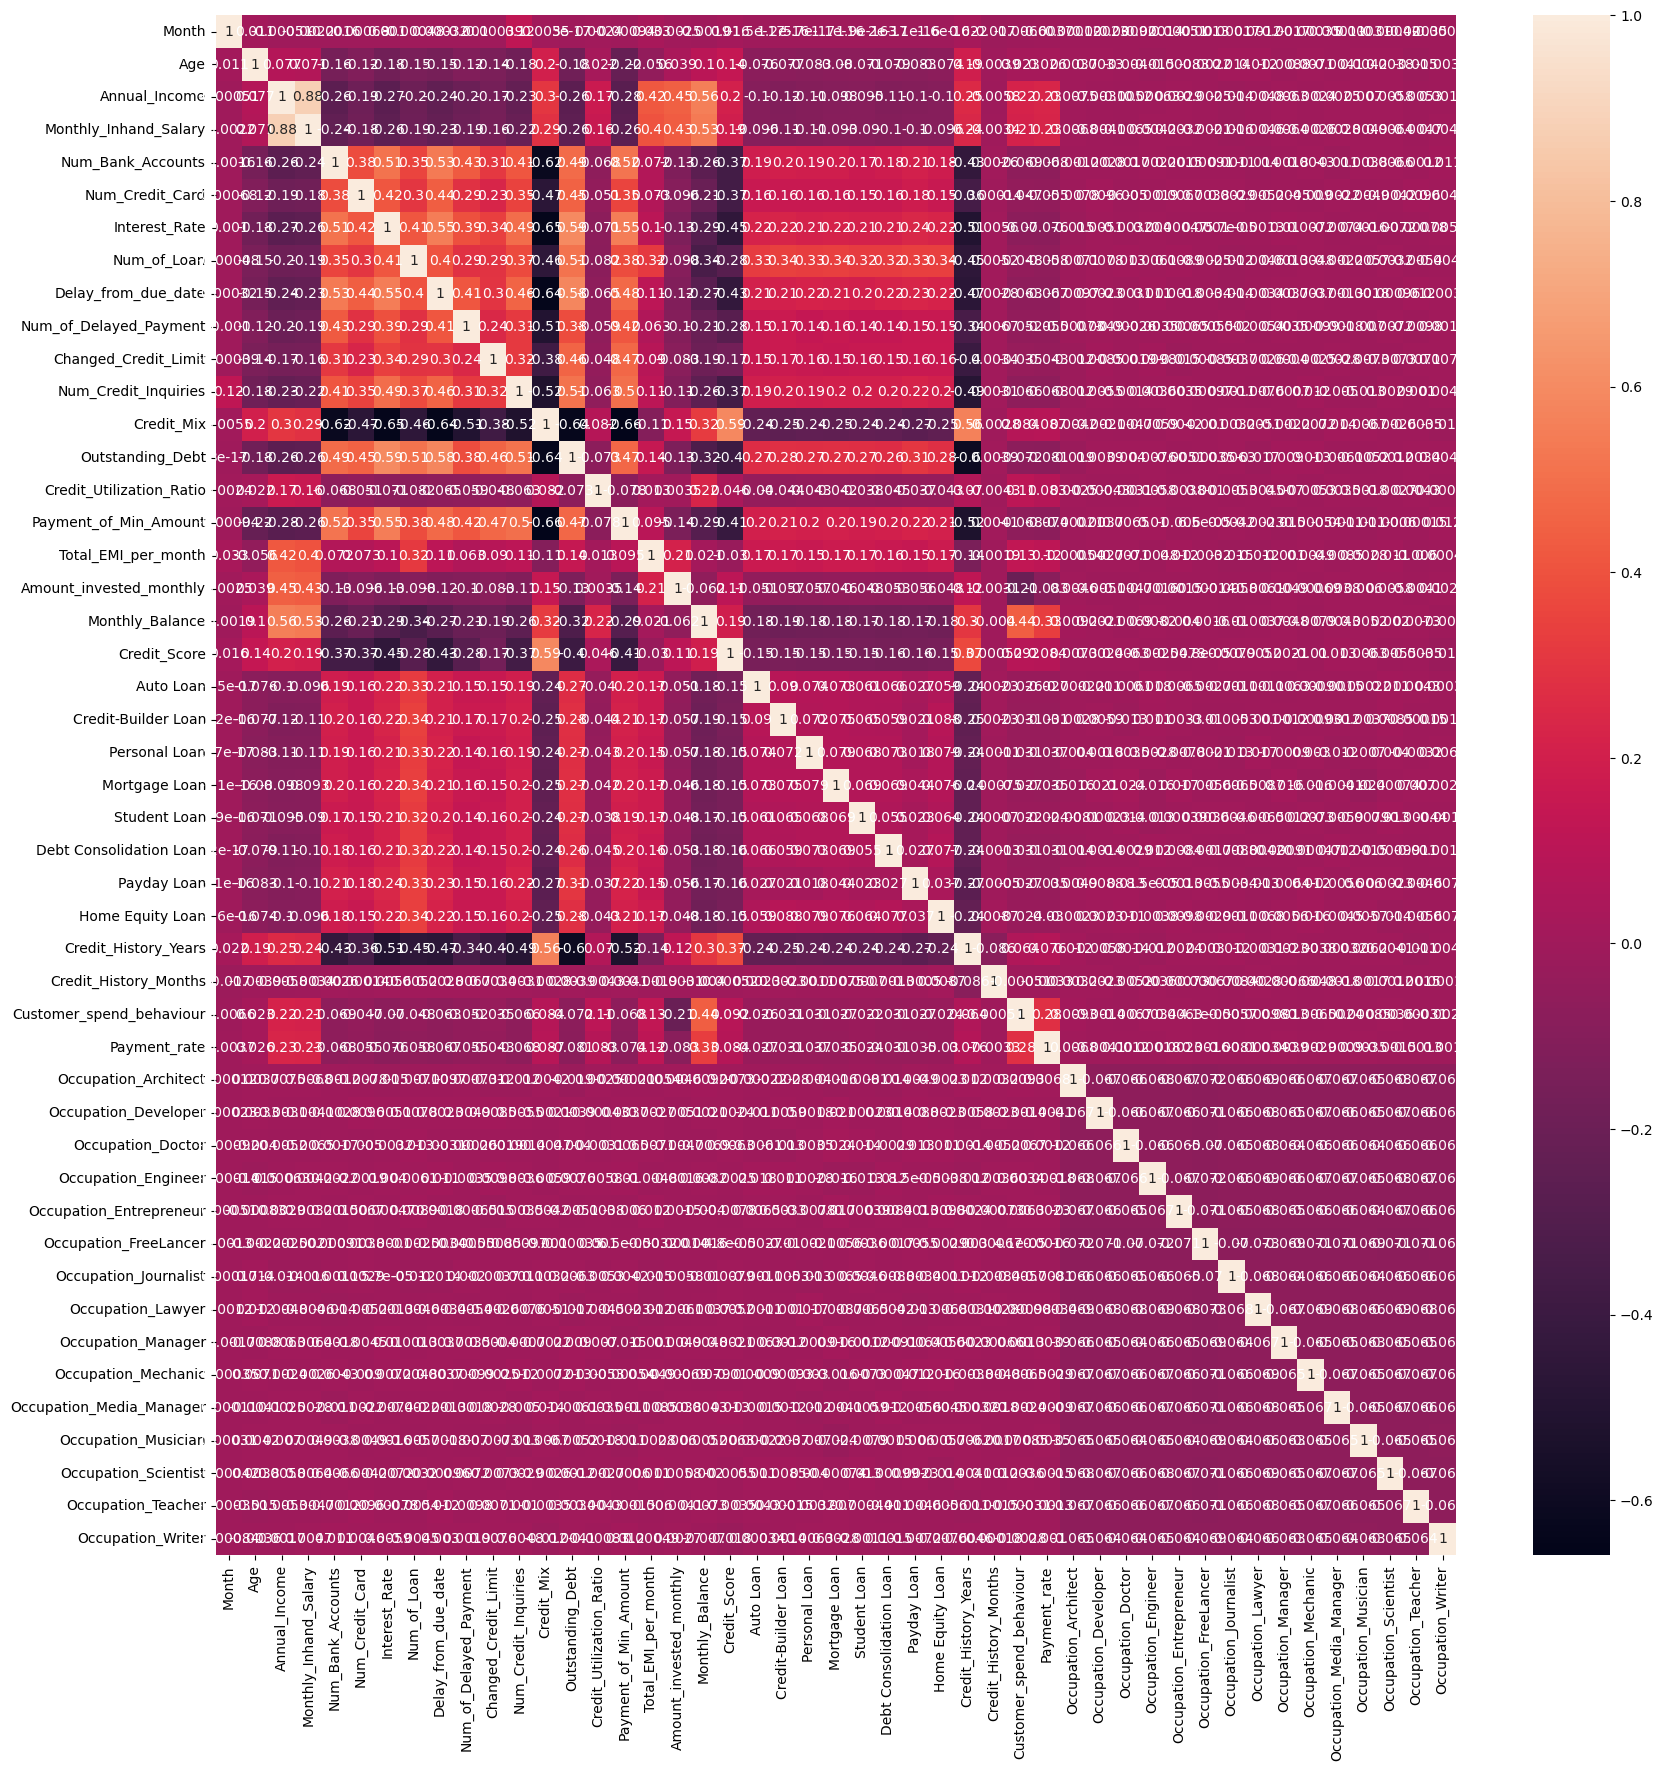

In [203]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot =True)

In [204]:
df.corr()['Credit_Score']

Month                       0.016291
Age                         0.141440
Annual_Income               0.204830
Monthly_Inhand_Salary       0.192413
Num_Bank_Accounts          -0.367051
Num_Credit_Card            -0.365724
Interest_Rate              -0.446396
Num_of_Loan                -0.277881
Delay_from_due_date        -0.434850
Num_of_Delayed_Payment     -0.278152
Changed_Credit_Limit       -0.169228
Num_Credit_Inquiries       -0.366017
Credit_Mix                  0.591036
Outstanding_Debt           -0.398906
Credit_Utilization_Ratio    0.045792
Payment_of_Min_Amount      -0.414525
Total_EMI_per_month        -0.029776
Amount_invested_monthly     0.105762
Monthly_Balance             0.190496
Credit_Score                1.000000
Auto Loan                  -0.153573
Credit-Builder Loan        -0.146575
Personal Loan              -0.148990
Mortgage Loan              -0.149826
Student Loan               -0.148499
Debt Consolidation Loan    -0.155630
Payday Loan                -0.158031
H

In [205]:
df.corr()['Credit_Score'].apply(lambda x : abs(x)>0.05)

Month                       False
Age                          True
Annual_Income                True
Monthly_Inhand_Salary        True
Num_Bank_Accounts            True
Num_Credit_Card              True
Interest_Rate                True
Num_of_Loan                  True
Delay_from_due_date          True
Num_of_Delayed_Payment       True
Changed_Credit_Limit         True
Num_Credit_Inquiries         True
Credit_Mix                   True
Outstanding_Debt             True
Credit_Utilization_Ratio    False
Payment_of_Min_Amount        True
Total_EMI_per_month         False
Amount_invested_monthly      True
Monthly_Balance              True
Credit_Score                 True
Auto Loan                    True
Credit-Builder Loan          True
Personal Loan                True
Mortgage Loan                True
Student Loan                 True
Debt Consolidation Loan      True
Payday Loan                  True
Home Equity Loan             True
Credit_History_Years         True
Credit_History

In [206]:
ser = df.corr()['Credit_Score'].apply(lambda x : abs(x)>0.05)
columns = [ind for ind in ser.index if ser[ind] == True]
df = df[columns]


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  float64
 1   Annual_Income             100000 non-null  float64
 2   Monthly_Inhand_Salary     100000 non-null  float64
 3   Num_Bank_Accounts         100000 non-null  int64  
 4   Num_Credit_Card           100000 non-null  float64
 5   Interest_Rate             100000 non-null  int64  
 6   Num_of_Loan               100000 non-null  int32  
 7   Delay_from_due_date       100000 non-null  int64  
 8   Num_of_Delayed_Payment    100000 non-null  float64
 9   Changed_Credit_Limit      100000 non-null  float64
 10  Num_Credit_Inquiries      100000 non-null  int32  
 11  Credit_Mix                100000 non-null  int64  
 12  Outstanding_Debt          100000 non-null  float64
 13  Payment_of_Min_Amount     100000 non-null  in

# Random Forest Classifier

In [208]:
X = df.drop('Credit_Score',axis=1).values
y = df['Credit_Score'].values


In [209]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [210]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)



In [211]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
def evaluate_model(X_test,y_test,model):
  y_pred = model.predict(X_test)
  #accuracy
  acc = accuracy_score(y_test,y_pred)
  recall = recall_score(y_test,y_pred,average='macro')
  precision = precision_score(y_test,y_pred,average='macro')
  f1 = f1_score(y_test,y_pred,average='macro')
  cm = confusion_matrix(y_test,y_pred)

  specificity = cm[0,0]/(cm[0,1]+cm[0,0])
  return pd.Series({'Accuracy':acc,'Recall':recall,'Precision':precision,'F1 Score':f1,'Specificity':specificity})

    

In [212]:
pd.DataFrame({'Random Forest Classifier (Test) ':evaluate_model(X_test,y_test,model),
              'Random Forest Classifier (Train)':evaluate_model(X_train,y_train,model)})

Random Forest Classifier (Test)   \
Accuracy                             0.824700   
Recall                               0.822471   
Precision                            0.809054   
F1 Score                             0.815348   
Specificity                          0.860945   

             Random Forest Classifier (Train)  
Accuracy                                  1.0  
Recall                                    1.0  
Precision                                 1.0  
F1 Score                                  1.0  
Specificity                               1.0

>- It seems that we have overfitting

# Fix Imbalancing Data

In [213]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
from imblearn.combine import SMOTETomek
smt = SMOTETomek()
n_X_train,n_y_train = smt.fit_resample(X_train,y_train)



In [214]:
model = RandomForestClassifier()
model.fit(n_X_train,n_y_train)
y_pred = model.predict(X_test)

In [215]:
pd.DataFrame({'Random Forest Classifier (Test) ':evaluate_model(X_test,y_test,model),
              'Random Forest Classifier (Train)':evaluate_model(n_X_train,n_y_train,model)})

Random Forest Classifier (Test)   \
Accuracy                             0.811000   
Recall                               0.820867   
Precision                            0.787634   
F1 Score                             0.801048   
Specificity                          0.886062   

             Random Forest Classifier (Train)  
Accuracy                                  1.0  
Recall                                    1.0  
Precision                                 1.0  
F1 Score                                  1.0  
Specificity                               1.0

>- Still Overfitting

# KNN

In [216]:
X = df.drop('Credit_Score',axis=1).values
y = df['Credit_Score'].values


In [217]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [218]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [221]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(X_train,y_train)
y_pred = model2.predict(X_test)


In [222]:
pd.DataFrame({'KNN (Test) ':evaluate_model(X_test,y_test,model2),
              'KNN (Train)':evaluate_model(X_train,y_train,model2)})

KNN (Test)   KNN (Train)
Accuracy        0.739900     0.826375
Recall          0.707025     0.807520
Precision       0.719126     0.816103
F1 Score        0.712346     0.811245
Specificity     0.775156     0.862536

# Imbalancing Data

In [223]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)


In [224]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek()
n_X_train,n_y_train = smt.fit_resample(X_train,y_train)
scaler = StandardScaler()
n_X_train = scaler.fit_transform(n_X_train)
X_test = scaler.transform(X_test)



In [225]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=3)
model2.fit(n_X_train,n_y_train)
y_pred = model2.predict(X_test)

In [226]:
pd.DataFrame({'KNN (Test) ':evaluate_model(X_test,y_test,model2),
              'KNN (Train)':evaluate_model(n_X_train,n_y_train,model2)})

KNN (Test)   KNN (Train)
Accuracy        0.726950     0.930515
Recall          0.751465     0.928544
Precision       0.703644     0.934015
F1 Score        0.717409     0.928363
Specificity     0.865071     0.983778